# Visualisation of the Results

This file contains the generation of the following main figures (and table):
- **Fig 2**: Displays the posterior distribution of the $R_0$ values and the joint and marginal posterior distributions of $\beta$ and $\gamma$ for both ST131-A and ST131-C2.
- **Table 1**: Mean, median and 95% credible intervals for the parameters of interest $R_0$, $\beta$ and $\gamma$.
- **Fig 3**: The fit of the estimated parameters to the data.

Supporting information:
- **Fig. S1**: Estimated colonisation incidence in the population for clades A and C2.
- **Fig. S2**: Illustration of exponential smoothing and the effect of $\alpha$ on example data.
- **Fig. S3**: Discrepancy values as a ($\beta$, $\gamma$) scatterplot.
- **Fig. S4**: Posterior distributions of all estimated parameters for ST131-A.
- **Fig. S5**: Posterior distributions of all estimated parameters for ST131-C2.

In [325]:
# Set the directory to save the figures to:

savedir <- "res/article_vis/"

# parameter names and variables
reparam <- T
par1_var <- "par1"
par2_var <- "par2"
par1_name <- "Net transmission rate"
par2_name <- "R"


# Read the data
datadir <- "data/res/"
obs_data <- read.csv("data/NORM_incidence_updated.csv") 

# truncated R, 100000, A: local, C2: cluster
dir_A <- "res/elfi_res/A_results/clade_A_2024-12-11_13-19-28/csvs/" # additional years = 5, weighted prediction
#"res/elfi_res/A_results/clade_A_2024-12-10_15-30-36/csvs/" # fixed Dt, not weighted prediction
dir_C2 <- "res/elfi_res/C2_results/clade_C2_2024-12-10_15-28-38/csvs/"
dir_A <- "res/elfi_res/A_results/clade_A_2024-12-18_15-30-05/csvs/"
dir_C2 <- "res/elfi_res/C2_results/clade_C2_2024-12-18_14-32-36/csvs/"

# test: convergence plot
#dir_A <- "res/elfi_res/A_results/clade_A_2025-05-02_13-47-06/csvs/"
#dir_C2 <- "res/elfi_res/C2_results/clade_C2_2025-05-02_13-51-25/csvs/"

# Updated. 10k, Dt, 0.5 yrs
#dir_A <- "res/elfi_res/A_results/clade_A_2025-05-05_10-50-55_10k_Dt_half_y/csvs/"
#dir_C2 <- "res/elfi_res/C2_results/clade_C2_2025-05-26_10-51-27_10k_Dt_half_y/csvs/"
#dir_C1 <- "res/elfi_res/C1_results/clade_C1_2025-05-19_14-21-16_10k/csvs/"

# Updated: joint weighting of posterior
dir_A <- "res/elfi_res/A_results/clade_A_2025-06-13_13-48-46_10k/csvs/"
dir_C2 <- "res/elfi_res/C2_results/clade_C2_2025-06-13_14-12-19_10k/csvs/"
dir_C1 <- "res/elfi_res/C1_results/clade_C1_2025-06-13_15-38-29_10k/csvs/"

# Updates to ABC-SMC
#dir_A <- "res/locally_optimal_ABCSMC/result_A_SIR/csvs/"
dir_A <- "res/elfi_res/A_results/clade_A_2025-07-02_14-32-56_10k/csvs/"
#dir_C2 <- "res/locally_optimal_ABCSMC/result_C2_SIR/csvs/"
dir_C2 <- "res/elfi_res/C2_results/clade_C2_2025-07-02_14-01-49_10k/csvs/"
#dir_C1 <- "res/locally_optimal_ABCSMC/result_C1_SIR/csvs/"
dir_C1 <- "res/elfi_res/C1_results/clade_C1_2025-07-02_11-42-38_10k/csvs/"

#savedir <- "res/locally_optimal_ABCSMC/vis/"


# Final results
dir_A <- "res/final_res/A_results/clade_A_2025-06-13_13-48-46_10k/csvs/"
dir_C2 <- "res/final_res/C2_results/clade_C2_2025-06-13_14-12-19_10k/csvs/"
dir_C1 <- "res/final_res/C1_results/clade_C1_2025-07-02_16-59-03_10k/csvs/"


#dir_C2 <- ""
# Set colors for each clade:
C2_col <- "#de8d16"
A_col <- "#34a8eb"
C1_col <- "#34c981"


# Other figure parameters:
dpi_value = 300
fw = 2.76
fh = 2.76
# Max width and height in cm (the width of an A4)
max_fw = 21
max_fh = 21

In [148]:
# Import libraries

library("ggplot2")
library("cowplot")
library("patchwork")

theme_set(theme_cowplot(12)) # font size
figwidth <- 3.4252 # width of the figures
figwidth <- 8.7
figheight <- figwidth
wwide <- 4.488189 # 11.4 cm, for two column figures

ax_title_fs <- 10
ax_ticks_fs <- 8
legend_fs <- 10

In [149]:
# Read the prior and posterior samples from csv files

posterior_samples_A <- read.csv(paste(dir_A, "result_samples.csv", sep = ""))
prior_samples_A <- read.csv(paste(dir_A, "result_prior.csv", sep = ""))

posterior_samples_C2 <- read.csv(paste(dir_C2, "result_samples.csv", sep = ""))
prior_samples_C2 <- read.csv(paste(dir_C2, "result_prior.csv", sep = ""))

posterior_samples_C1 <- read.csv(paste(dir_C1, "result_samples.csv", sep = ""))
prior_samples_C1 <- read.csv(paste(dir_C1, "result_prior.csv", sep = ""))

# Read the discrepancies
disc_samples_A <- read.csv(paste(dir_A, "result_discrepancies.csv", sep = ""))
disc_samples_C2 <- read.csv(paste(dir_C2, "result_discrepancies.csv", sep = ""))
disc_samples_C1 <- read.csv(paste(dir_C1, "result_discrepancies.csv", sep = ""))

In [150]:
dim(posterior_samples_A)
dim(posterior_samples_C2)
dim(posterior_samples_C1)

[1] 10000     3

[1] 10000     3

[1] 10000     3

In [151]:
# Read the predicted fit generated by the ELFI nodes

pred_A <- read.csv(paste(dir_A, "BSI_yearly_node.csv", sep = ""))

pred_C2 <- read.csv(paste(dir_C2, "BSI_yearly_node.csv", sep = ""))

pred_C1 <- read.csv(paste(dir_C1, "BSI_yearly_node.csv", sep = ""))

## Main Results

**Table 1**: Point estimates and credible intervals for all parameters of interest.

**Figure 2**: Posterior distributions of all parameters. Marginal and joint distributions for $\beta$ and $\gamma$. Saved as `posterior_panel.pdf`.

**Figure 3**: Observed data plotted alongside the estimated predicted data.


In [152]:
## Combine prior and posterior:

combine_prior_and_posterior <- function(posterior_samples, prior_samples){
    #' Combine prior and posterior samples in a single data frame with indicator variable on sample origin (prior or posterior)
    #' reparam and par2_var are global variables specified in the beginning of this notebook
    
    posterior_samples$distr <- rep("Posterior", dim(posterior_samples)[1])
    prior_samples$distr <- rep("Prior", dim(prior_samples)[1])
    
    df <- rbind(posterior_samples, prior_samples)
    
    if (reparam){
        R_col <- rbind(posterior_samples[par2_var], prior_samples[par2_var])
        names(R_col) <- c("R0")
        df <- cbind(df, R_col)
    }else{
        df$R0 <- c(posterior_samples$beta/posterior_samples$gamma, prior_samples$beta/prior_samples$gamma)
    }
    
    return(df)
    
}

In [153]:
# Clade A

df_A <- combine_prior_and_posterior(posterior_samples_A, prior_samples_A)

# Clade C2

df_C2 <- combine_prior_and_posterior(posterior_samples_C2, prior_samples_C2)

# Clade C1

df_C1 <- combine_prior_and_posterior(posterior_samples_C1, prior_samples_C1)

In [154]:
head(df_A)

par1       par2     Dt         distr     R0      
1 0.02294932 1.302409 0.02426425 Posterior 1.302409
2 0.02526236 1.461159 0.02521925 Posterior 1.461159
3 0.02178344 1.304244 0.01685524 Posterior 1.304244
4 0.02151930 1.517063 0.02241613 Posterior 1.517063
5 0.02399130 1.466230 0.02310444 Posterior 1.466230
6 0.02529128 1.525967 0.02283348 Posterior 1.525967

In [155]:
# Let's merge the data

df_A$clade <- rep("A", dim(df_A)[1])
df_C2$clade <- rep("C2", dim(df_C2)[1])
df_C1$clade <- rep("C1", dim(df_C1)[1])

df <- rbind(df_A, df_C2, df_C1)

# Save labels for R0 for A and C2:
lab_A <- as.character(paste(expression(R[0]),"==", deparse(formatC(signif(median(df_A[which(df_A$distr == "Posterior"),"R0"]), 3), format='f', digits=2 ))))
lab_C2 <- as.character(paste(expression(R[0]),"==", deparse(formatC(signif(median(df_C2[which(df_C2$distr == "Posterior"),"R0"]), 3), format='f', digits=2 ))))
lab_C1 <- as.character(paste(expression(R[0]),"==", deparse(formatC(signif(median(df_C1[which(df_C1$distr == "Posterior"),"R0"]), 3), format='f', digits=2 ))))

print(lab_A)
print(lab_C2)
print(lab_C1)

lab_A_mean <- as.character(paste(expression(R[0]),"==", deparse(formatC(signif(mean(df_A[which(df_A$distr == "Posterior"),"R0"]), 3), format='f', digits=2 ))))
lab_C2_mean <- as.character(paste(expression(R[0]),"==", deparse(formatC(signif(mean(df_C2[which(df_C2$distr == "Posterior"),"R0"]), 3), format='f', digits=2 ))))
lab_C1_mean <- as.character(paste(expression(R[0]),"==", deparse(formatC(signif(mean(df_C1[which(df_C1$distr == "Posterior"),"R0"]), 3), format='f', digits=2 ))))


[1] "R[0] == \"1.47\""
[1] "R[0] == \"1.13\""
[1] "R[0] == \"1.18\""


### Table 1

Mean, median and 95% credible intervals for $R_0$ and $\tau$.

In [156]:
# Get the point estimates and 95% credible intervals for Table 1

get_summary <- function(df, clade, param){
    # Get the mean, median and 95% CI for a given parameter and clade
    # Returns a data frame
    d <- 3
    sp <- '%#.3g'
    if(param == "R0"){
        d <- 3
        sp <- '%#.3g'}
    mu <- sprintf(sp, signif(mean(df[which(df$clade == clade & df$distr == "Posterior"), param]), digits = d))
    med <- sprintf(sp, signif(median(df[which(df$clade == clade & df$distr == "Posterior"), param]), digits = d))
    ci95 <- quantile(df[which(df$clade == clade & df$distr == "Posterior"), param], probs = c(0.0025, 0.975))

    tab <- data.frame("clade" = clade, "param" = param,
    "mean" = mu, "median" = med,
    "ci95_lower" = sprintf(sp,signif(ci95["0.25%"], digits = 3)), "ci95_upper" = sprintf(sp,signif(ci95["97.5%"], digits = 2)))

    return(tab)
}

rbind(get_summary(df, "A", "R0"), get_summary(df, "A", par1_var), get_summary(df, "A", par2_var))
rbind(get_summary(df, "C2", "R0"), get_summary(df, "C2", par1_var), get_summary(df, "C2", par2_var))
rbind(get_summary(df, "C1", "R0"), get_summary(df, "C1", par1_var), get_summary(df, "C1", par2_var))

clade param mean   median ci95_lower ci95_upper
1 A     R0    1.47   1.47   1.29       1.60      
2 A     par1  0.0249 0.0248 0.0211     0.0280    
3 A     par2  1.47   1.47   1.29       1.60

clade param mean   median ci95_lower ci95_upper
1 C2    R0    1.13   1.13   1.08       1.20      
2 C2    par1  0.0228 0.0227 0.0180     0.0270    
3 C2    par2  1.13   1.13   1.08       1.20

clade param mean   median ci95_lower ci95_upper
1 C1    R0    1.18   1.18   1.12       1.20      
2 C1    par1  0.0164 0.0164 0.0137     0.0180    
3 C1    par2  1.18   1.18   1.12       1.20

### Figure 2: $R_0$ Posterior distribution

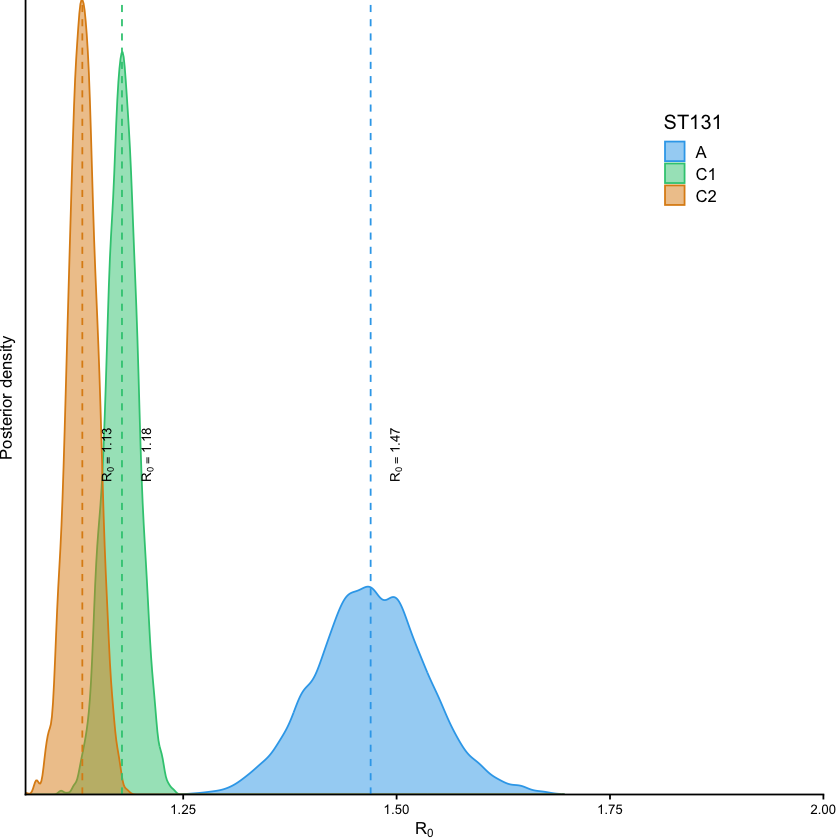

In [164]:
# Determine font size & offset for vertical line annotations
fs_R0 <- 8
x_offset <- 0.03
y_offset <- 10

post_df <- df[which(df$distr == "Posterior"),] # plot posterior distribution only

p_R0 <- ggplot(post_df, aes(fill = clade, x = R0)) + 
    labs(title = NULL, x = expression(R[0]), y = "Posterior density") +
    coord_cartesian(xlim = c(min(df_C2[which(df_C2$distr == "Posterior"),"R0"]), 2), expand = FALSE) +
    geom_density(aes(color = clade), alpha = 0.5) +
    scale_color_manual(name = "ST131", values = c(A_col, C1_col, C2_col), labels = c("A", "C1", "C2")) +
    scale_fill_manual(name = "ST131", values = c(A_col, C1_col, C2_col), labels = c("A", "C1", "C2")) +
    #scale_linetype_manual(name = "Estimate", values = c("dashed", "solid"), labels = c("Median", "Mean")) +
    geom_vline(xintercept = median(df_A[which(df_A$distr == "Posterior"),"R0"]), color = A_col, linewidth = 0.5, linetype = "dashed") +
    annotate("text", x = median(df_A[which(df_A$distr == "Posterior"),"R0"]) + x_offset, y = y_offset, angle = 90, label = lab_A, size = fs_R0/.pt, parse = TRUE) +
    geom_vline(xintercept = median(df_C2[which(df_C2$distr == "Posterior"),"R0"]), color = C2_col, linewidth = 0.5, linetype = "dashed") +
    annotate("text", x = median(df_C2[which(df_C2$distr == "Posterior"),"R0"]) + x_offset, y = y_offset, angle = 90, label = lab_C2, size = fs_R0/.pt, parse = TRUE) +
    geom_vline(xintercept = median(df_C1[which(df_C1$distr == "Posterior"),"R0"]), color = C1_col, linewidth = 0.5, linetype = "dashed") +
    annotate("text", x = median(df_C1[which(df_C1$distr == "Posterior"),"R0"]) + x_offset, y = y_offset, angle = 90, label = lab_C1, size = fs_R0/.pt, parse = TRUE) +
    theme(legend.position = c(0.8, 0.8), axis.ticks.y=element_blank(),plot.margin = margin(0, 10, 0, 0),
          axis.text.x = element_text(size = ax_ticks_fs), # , angle = 45 
          axis.text.y = element_blank(),
          axis.title.x = element_text(size = ax_title_fs),
          axis.title.y = element_text(size = ax_title_fs),
          legend.text = element_text(size = legend_fs))

p_R0

ggsave(p_R0, filename = paste(savedir, "R0_plot.pdf", sep = ""), width = 5, height = 5, dpi = dpi_value) 


#, width = 8.7, height = 8.7, units = "cm")

### Figure 3: Joint and marginal posterior distributions for net transmission and R

In [159]:
# 2d densityplot with marginals

plot_2d_density_marginals <- function(df, clade, col, xmin, xmax, ymin, ymax, sep_figs = FALSE){
    #' Plot the contours of the joint distribution of par1 and par2 and their marginals
    #'
    #' @param df Data frame containing parameter estimates.
    #' @param clade Clade of interest, for example "A".
    #' @param col Colour of the figures.
    #' @param xmin, xmax, ymin, ymax Limits for axes.
    #' @param sep_figs If TRUE, return the marginals and joint distribution as separate figures in a list.
    
    post_df <- df[which(df$distr == "Posterior"),]

    x_ax_fs <- 8
    p_joint_distr <- ggplot(post_df, aes(x = par1, y = par2)) +
    geom_density_2d(colour = col, linewidth = 0.2) +
    coord_cartesian(xlim = c(xmin, xmax), ylim = c(ymin, ymax), expand = FALSE) +
    labs(y = par2_name, x = par1_name, title = paste0("ST131-", clade)) +
    #scale_x_continuous(name = par1_name, limits = c(xmin, xmax), expand = c(0, 0)) +
    #scale_y_continuous(name = par2_name, limits = c(ymin, ymax), expand = c(0, 0)) +
    theme(plot.margin = margin(0),
          plot.title = element_text(vjust = 1, hjust = 0.05, margin = margin(0, 0, -20, 0)),
          axis.text.x = element_text(angle = 45, vjust = 0.5, size = x_ax_fs),
          axis.text.y = element_text(size = x_ax_fs),
          text = element_text(size = 8))

    p_d_par2 <- ggplot(post_df, aes(x = par2)) +
        geom_density(color = FALSE, fill = col, alpha = 0.5) +
        #coord_cartesian(ylim = c(ymin, ymax)) +
        #scale_x_continuous(name = par2_name, limits = c(ymin, ymax), expand = c(0, 0, 0, 0)) +
        theme_void() + 
        theme(plot.margin = margin(0), plot.title = element_blank(),axis.title.x = element_blank()) +
        coord_flip(xlim = c(ymin, ymax), expand = FALSE) #xlim = c(ymin, ymax), 
    
    
    p_d_par1 <- ggplot(post_df, aes(x = par1)) +
        geom_density(col = FALSE, fill = col, alpha = 0.5) +
        coord_cartesian(xlim = c(xmin, xmax), expand = FALSE) +
        #scale_x_continuous(name = par1_name, limits = c(xmin, xmax), expand = c(0, 0, 0, 0)) +
        theme_void() +
        theme(plot.margin = margin(0), plot.title = element_blank(),axis.title.x = element_blank())
                    
    p <- p_d_par1 + plot_spacer() + p_joint_distr + p_d_par2 +
    plot_layout(ncol = 2, nrow = 2, widths = c(4, 1), heights = c(1, 4))

    if (sep_figs){
        return(list(p_d_par1, p_d_par2, p_joint_distr))
    }else{
        return(p)
    }
    
    
}

# Axis limits
xmax <- 0.035
xmin <- 0.01
ymax <- 2
ymin <- 1

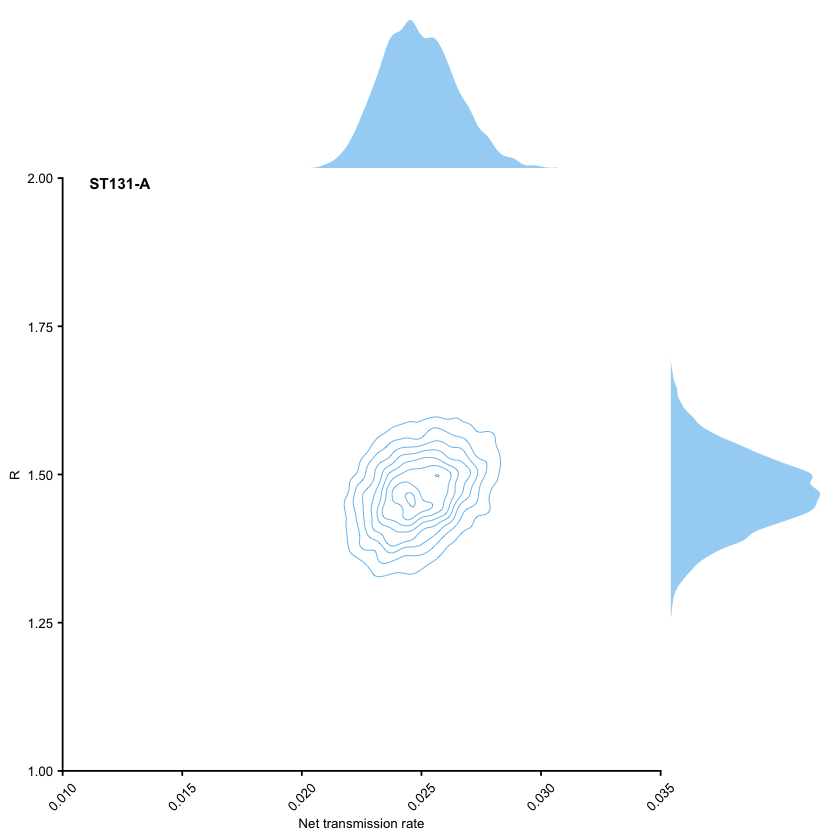

In [165]:
# Clade A

p_2d_A <- plot_2d_density_marginals(df_A, "A", A_col, xmin, xmax, ymin, ymax)
p_2d_A
ggsave(p_2d_A, filename = paste(savedir, "posterior_marginals_A.pdf", sep = ""), width = 17.8, height = 8, unit = "cm", dpi = dpi_value)

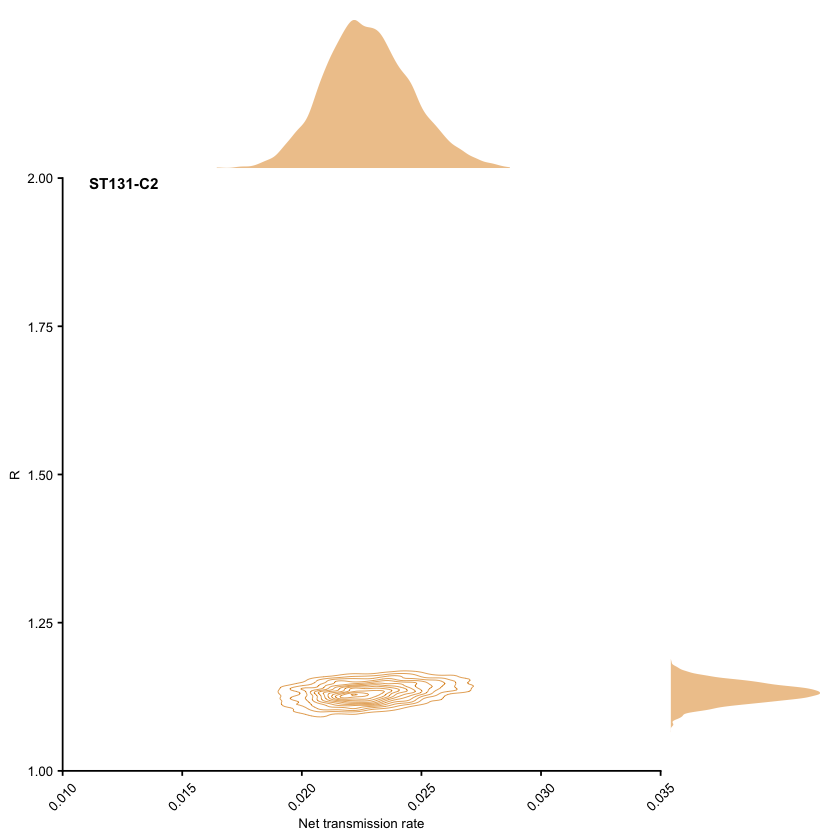

In [166]:
# Clade C2

p_2d_C2 <- plot_2d_density_marginals(df_C2, "C2", C2_col, xmin, xmax, ymin, ymax)
p_2d_C2
ggsave(p_2d_C2, filename = paste(savedir, "posterior_marginals_C2.pdf", sep = ""), width = 17.8, height = 8, unit = "cm", dpi = dpi_value)

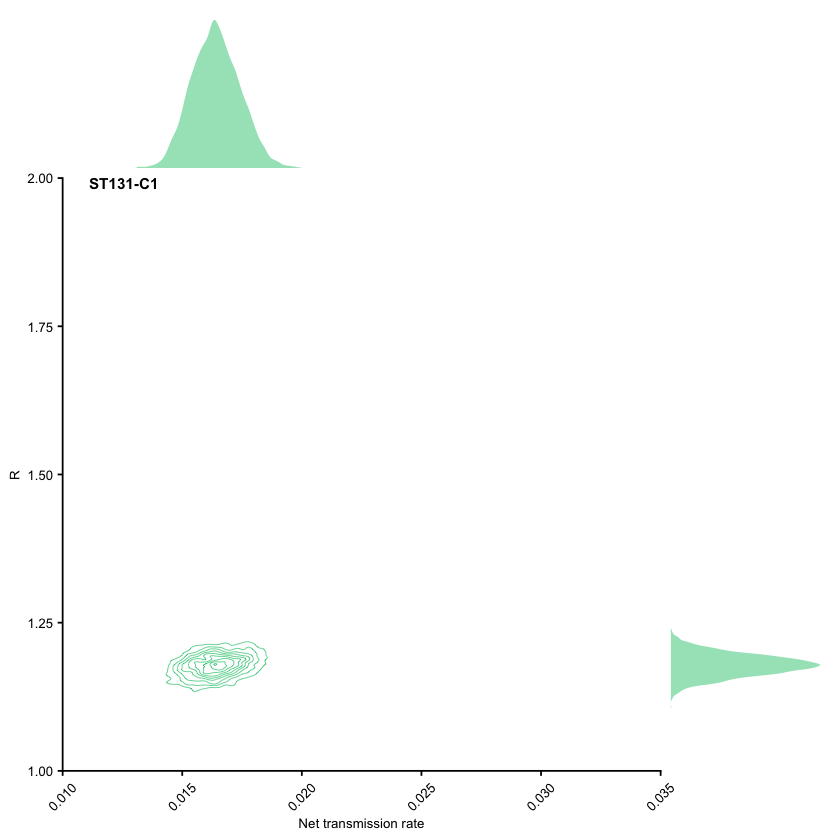

In [167]:
# Clade C1

p_2d_C1 <- plot_2d_density_marginals(df_C1, "C1", C1_col, xmin, xmax, ymin, ymax)
p_2d_C1

ggsave(p_2d_C1, filename = paste(savedir, "posterior_marginals_C1.pdf", sep = ""), width = 10, height = 10, unit = "cm", dpi = dpi_value)

In [168]:
# Get separate figures to plot all densities together
plots_A <- plot_2d_density_marginals(df_A, "A", A_col, xmin, xmax, ymin, ymax, sep_figs = TRUE)
plots_C2 <- plot_2d_density_marginals(df_C2, "C2", C2_col, xmin, xmax, ymin, ymax, sep_figs = TRUE)
plots_C1 <- plot_2d_density_marginals(df_C1, "C1", C1_col, xmin, xmax, ymin, ymax, sep_figs = TRUE)

p_posterior_fig <- plots_A[[1]] + plot_spacer() + plots_C2[[1]] + plot_spacer() + plots_C1[[1]] + plot_spacer() +
plots_A[[3]] + plots_A[[2]] + plots_C2[[3]] + plots_C2[[2]] + plots_C1[[3]] + plots_C1[[2]] +
plot_layout(ncol = 6, nrow = 2, widths = c(4,1,4,1,4,1), heights = c(1,4))

In [169]:
ggsave(p_posterior_fig, filename = paste(savedir, "marginals_panel.pdf", sep = ""), width = 10, height = 5, dpi = dpi_value)

### Figure 4: Fit to data

The fit of the estimated parameters to data. Median, 50% and 95% credible intervals are included. 

In [219]:
# Get the median and 95% CIs for a clade of interest

get_cis <- function(pred, years, a = 0.95, l = 0.5){
    #' Find 95% CIs, pointwise
    #'
    #' @param pred Posterior predictive BSI-
    #' @param years Years of interest as a vector.
    #' @param a Outer CI, default 0.95.
    #' @param l Inner CI, default 0.5.

    df_fit <- as.data.frame(t(apply(pred, 2, quantile, c((1-a)/2, 1 - (1-a)/2))))
    df_fit50 <- as.data.frame(t(apply(pred, 2, quantile, c((1-l)/2, 1 - (1-l)/2))))
    df_fit100 <- as.data.frame(t(apply(pred, 2, quantile, c(0, 1))))
    df_fit <- cbind(df_fit, df_fit50)
    df_fit <- cbind(df_fit, df_fit100)
    
    # Find the median, pointwise
    df_fit$med <- apply(pred, 2, median)
    df_fit$Year <- years

    colnames(df_fit) <- c("ciu", "cil", "ciu50", "cil50", "ciu100", "cil100", "med", "Year")
    
    return(df_fit)
}

df_fit_A <- get_cis(pred_A, obs_data$Year, a = 0.95)
df_fit_C2 <- get_cis(pred_C2, 2007:2017, a = 0.95) # NOTE: 2007:2017
df_fit_C1 <- get_cis(pred_C1, 2004:2022, a = 0.95)

In [220]:
# Combine clades A and C2

df_fit_A$clade <- rep("A", dim(df_fit_A)[1])
df_fit_C2$clade <- rep("C2", dim(df_fit_C2)[1])
df_fit_C1$clade <- rep("C1", dim(df_fit_C1)[1])

df_fit <- rbind(df_fit_A, df_fit_C2, df_fit_C1)
df_fit$Data <- rep("Estimated", dim(df_fit)[1])

# Add observed data as an extra row:

mutate_obs_data <- function(obs_data, clade){
    #' Format observed data for rbind with estimated data
    #' @param obs_data Observed data.
    #' @param clade Clade of interest, for example "A".
    
    obs_df <- obs_data[,c(clade, "Year")]
    obs_df$clade <- rep(clade, dim(obs_df)[1])
    names(obs_df)[names(obs_df) == clade] <- "med"
    
    # Add placeholder columns for CIs
    obs_df["cil"] <- rep(NA, dim(obs_df)[1])
    obs_df["ciu"] <- rep(NA, dim(obs_df)[1])
    obs_df["cil50"] <- rep(NA, dim(obs_df)[1])
    obs_df["ciu50"] <- rep(NA, dim(obs_df)[1])
    obs_df["cil100"] <- rep(NA, dim(obs_df)[1])
    obs_df["ciu100"] <- rep(NA, dim(obs_df)[1])
    
    
    obs_df$Data <- rep("Observed", dim(obs_df)[1])
    
    return(obs_df)

}


obs_df_A <- mutate_obs_data(obs_data, "A")
obs_df_C2 <- mutate_obs_data(obs_data[4:14,], "C2") #obs_data[4:14,]
obs_df_C1 <- mutate_obs_data(obs_data, "C1")

df_fit <- rbind(df_fit, rbind(obs_df_A, obs_df_C2, obs_df_C1))

head(df_fit)

ciu cil ciu50 cil50 ciu100 cil100 med Year clade Data     
X0 1   10  4     7     0      14     5   2004 A     Estimated
X1 1   10  4     7     0      17     5   2005 A     Estimated
X2 1   10  4     7     0      16     5   2006 A     Estimated
X3 1   10  4     7     0      18     5   2007 A     Estimated
X4 1   10  4     7     0      15     5   2008 A     Estimated
X5 2   11  4     8     0      17     6   2009 A     Estimated

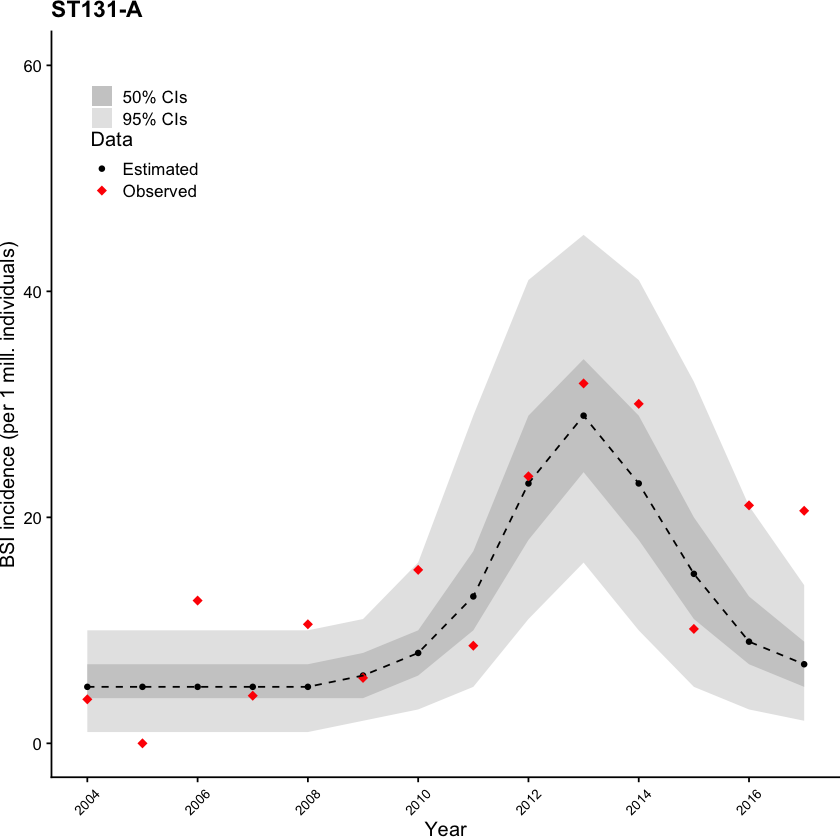

In [255]:
ylim_max <- 60

p_fit_A <- ggplot(df_fit[which(df_fit$clade == "A"),], aes(x = Year, y = med)) +
    geom_ribbon(aes(ymin = cil, ymax = ciu, fill = "grey90"), na.rm = TRUE) + 
    geom_ribbon(aes(ymin = cil50, ymax = ciu50, fill = "grey80"), na.rm = TRUE) +
    #geom_ribbon(aes(ymin = cil100, ymax = ciu100), na.rm = TRUE, color = "gray70", fill = NA, lty = "dashed") +
    geom_point(aes(y = med, color = Data, shape = Data, size = Data)) +
    geom_line(data = df_fit[which(df_fit$clade == "A" & df_fit$Data == "Estimated"),], aes(y = med), linetype = "dashed") +
    scale_fill_identity(name = NULL, guide = 'legend',labels = c('50% CIs', "95% CIs")) +
    scale_color_manual(values = c("black", "red")) +
    scale_shape_manual(values = c(16, 18)) +
    labs(y = "BSI incidence (per 1 mill. individuals)", title = "ST131-A") + # expression("R"["BSI"])
    scale_size_manual(values = c(1.5, 2.5)) +
    scale_x_continuous("Year", breaks = seq(min(obs_data$Year), max(obs_data$Year), 2)) +
    coord_cartesian(ylim = c(0, ylim_max)) +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.5, size = 8),
          axis.text.y = element_text(size = 10),
          legend.position = c(0.05, 0.85),
          plot.margin = unit(c(0, 0, 0, 0), "cm"), legend.spacing.y = unit(0, "pt"), legend.margin = margin(0, 0, 0, 0))

p_fit_A

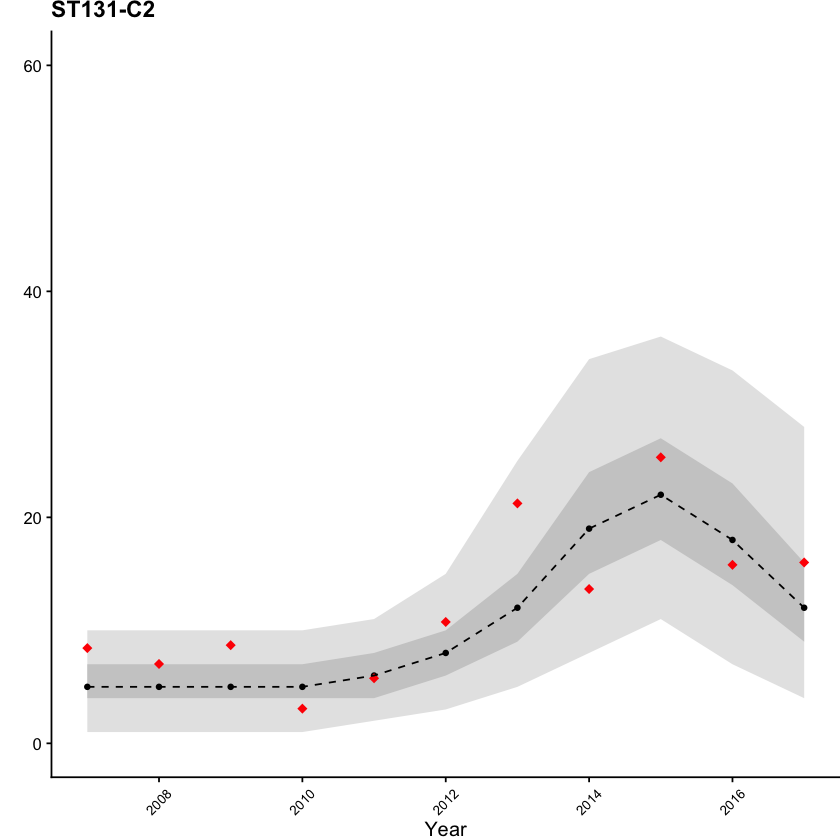

In [260]:
p_fit_C2 <- ggplot(df_fit[which(df_fit$clade == "C2"),], aes(x = Year, y = med)) +
    geom_ribbon(aes(ymin = cil, ymax = ciu, fill = "grey90"), na.rm = TRUE) + 
    geom_ribbon(aes(ymin = cil50, ymax = ciu50, fill = "grey80"), na.rm = TRUE) +
    #geom_ribbon(aes(ymin = cil100, ymax = ciu100), na.rm = TRUE, color = "gray70", fill = NA, lty = "dashed") +
    geom_point(aes(y = med, color = Data, shape = Data, size = Data)) +
    geom_line(data = df_fit[which(df_fit$clade == "C2" & df_fit$Data == "Estimated"),], aes(y = med), linetype = "dashed") +
    scale_fill_identity(name = NULL, guide = 'legend',labels = c('50% CIs', "95% CIs")) +
    scale_color_manual(values = c("black", "red")) +
    scale_shape_manual(values = c(16, 18)) +
    labs(y = "", title = "ST131-C2") +
    scale_size_manual(values = c(1.5, 2.5)) +
    scale_x_continuous("Year", breaks = seq(min(obs_data$Year), max(obs_data$Year), 2)) +
    coord_cartesian(ylim = c(0, ylim_max)) +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.5, size = 8),
          axis.text.y = element_text(size = 10),
          legend.position = "none",
          plot.margin = unit(c(0, 0, 0, 0), "cm"), legend.spacing.y = unit(0, "pt"), legend.margin = margin(0, 0, 0, 0))

p_fit_C2

In [261]:
2005:2022

[1] 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
[16] 2020 2021 2022

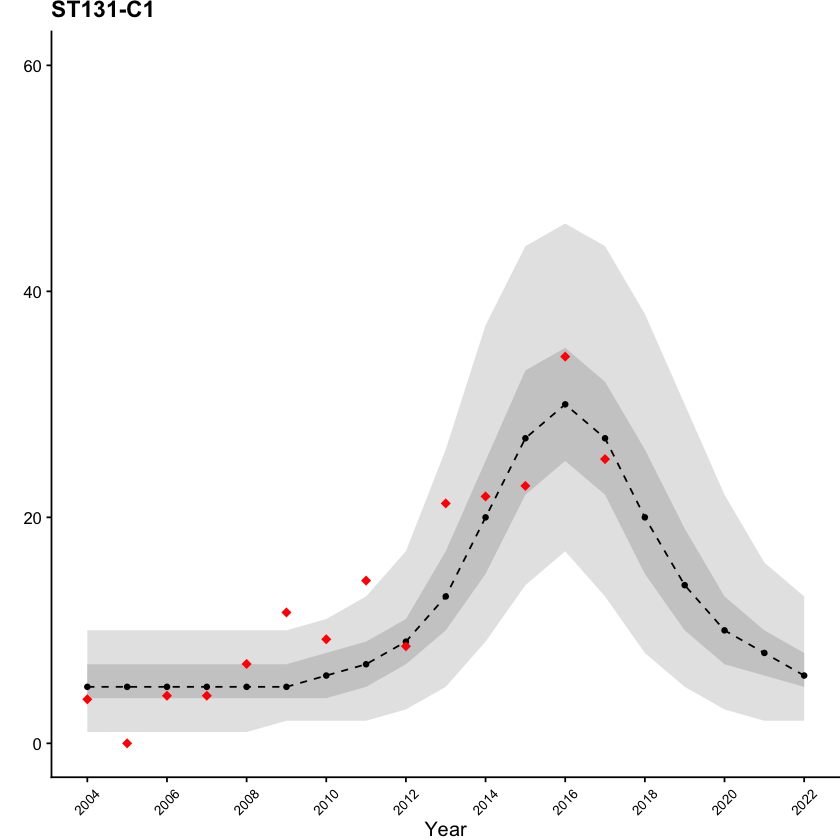

In [262]:
C1_labels = c(as.character(obs_data$Year), as.character(c(2005:2022)))
C1_breaks = seq(2004, 2022, by = 2)#c(obs_data$Year, 2005:2022)

p_fit_C1 <- ggplot(df_fit[which(df_fit$clade == "C1"),], aes(x = Year, y = med)) +
    geom_ribbon(aes(ymin = cil, ymax = ciu, fill = "grey90"), na.rm = TRUE) + 
    geom_ribbon(aes(ymin = cil50, ymax = ciu50, fill = "grey80"), na.rm = TRUE) +
    #geom_ribbon(aes(ymin = cil100, ymax = ciu100), na.rm = TRUE, color = "gray70", fill = NA, lty = "dashed") +
    geom_point(aes(y = med, color = Data, shape = Data, size = Data)) +
    geom_line(data = df_fit[which(df_fit$clade == "C1" & df_fit$Data == "Estimated"),], aes(y = med), linetype = "dashed") +
    scale_fill_identity(name = NULL, guide = 'legend',labels = c('50% CIs', "95% CIs")) +
    scale_color_manual(values = c("black", "red")) +
    scale_shape_manual(values = c(16, 18)) +
    labs(y = "", title = "ST131-C1") +
    scale_size_manual(values = c(1.5, 2.5)) +
    scale_x_continuous("Year", breaks = C1_breaks) +
    coord_cartesian(ylim = c(0, ylim_max)) +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.5, size = 8),
          axis.text.y = element_text(size = 10),
          legend.position = "none",
          plot.margin = unit(c(0, 0, 0, 0), "cm"), legend.spacing.y = unit(0, "pt"), legend.margin = margin(0, 0, 0, 0))

p_fit_C1

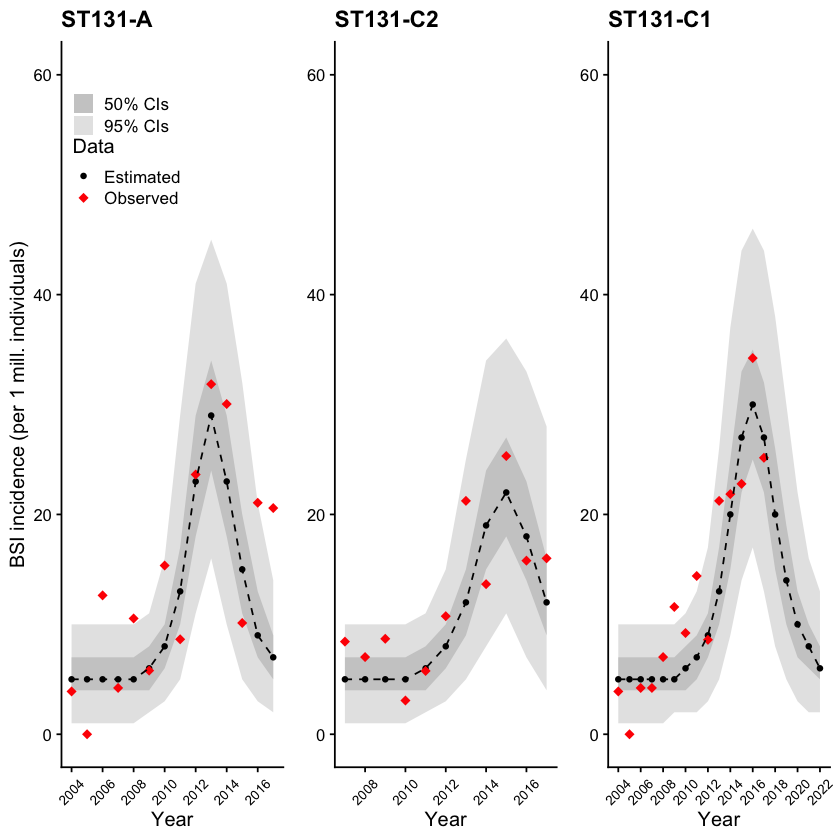

In [263]:
p_fit_A + p_fit_C2 + p_fit_C1


ggsave(p_fit_A + p_fit_C2 + p_fit_C1, filename = paste(savedir, "fit.pdf", sep = ""), width = 20, height = 10, units = "cm", dpi = dpi_value)

# Supporting Information

### Fig. S1: Estimated Colonisation

Mean, median and 95% CIs for the estimated colonisation, corresponding to the accepted posterior.

In [179]:
get_cis_col <- function(col, a = 0.95, l = 0.5){
    #' Get CIs and median for each week of posterior draws for the colonisation by clade A or C2
    #' @param col n_posterior_draws x n_col
    #' @param a Outer CI, default 0.95.
    #' @param l Inner CI, default 0.5.

    # Find 95% CIs, pointwise
    df_fit <- t(apply(col, 2, quantile, c((1-a)/2, 1 - (1-a)/2)))
    df_fit50 <- t(apply(col, 2, quantile, c((1-l)/2, 1 - (1-l)/2)))
    df_fit <- cbind(df_fit, df_fit50)
    
    # Find the median, pointwise
    df_fit <- cbind(df_fit, as.matrix(apply(col, 2, median)))
    rownames(df_fit) <- NULL
    colnames(df_fit) <- c("cil", "ciu", "cil50", "ciu50", "med")
    df_fit <- as.data.frame(df_fit)
    
    # Add week number
    df_fit$week <-  1:dim(col)[2]

    return(df_fit)
}

# Read colonisation posterior, add CIs and median for each week

col_A <- read.csv(paste(dir_A, "SIR_I_node.csv", sep = ""))
col_C2 <- read.csv(paste(dir_C2, "SIR_I_node.csv", sep = ""))
col_C1 <- read.csv(paste(dir_C1, "SIR_I_node.csv", sep = ""))

df_col_A <- get_cis_col(col_A, a = 0.95)
df_col_C2 <- get_cis_col(col_C2, a = 0.95)
df_col_C1 <- get_cis_col(col_C1, a = 0.95)

df_col_A$clade <- rep("A", dim(df_col_A)[1])
df_col_C2$clade <- rep("C2", dim(df_col_C2)[1])
df_col_C1$clade <- rep("C1", dim(df_col_C1)[1])

df_col <- rbind(df_col_A, df_col_C2, df_col_C1)

head(df_col)
dim(df_col)

cil      ciu      cil50    ciu50    med      week clade
1 1.000000 1.000000 1.000000 1.000000 1.000000 1    A    
2 1.022325 1.028470 1.024040 1.026260 1.025088 2    A    
3 1.045148 1.057751 1.048657 1.053211 1.050806 3    A    
4 1.068481 1.087865 1.073866 1.080868 1.077169 4    A    
5 1.092334 1.118837 1.099682 1.109252 1.104193 5    A    
6 1.116721 1.150691 1.126118 1.138382 1.131895 6    A

[1] 2366    7

[1] 2017


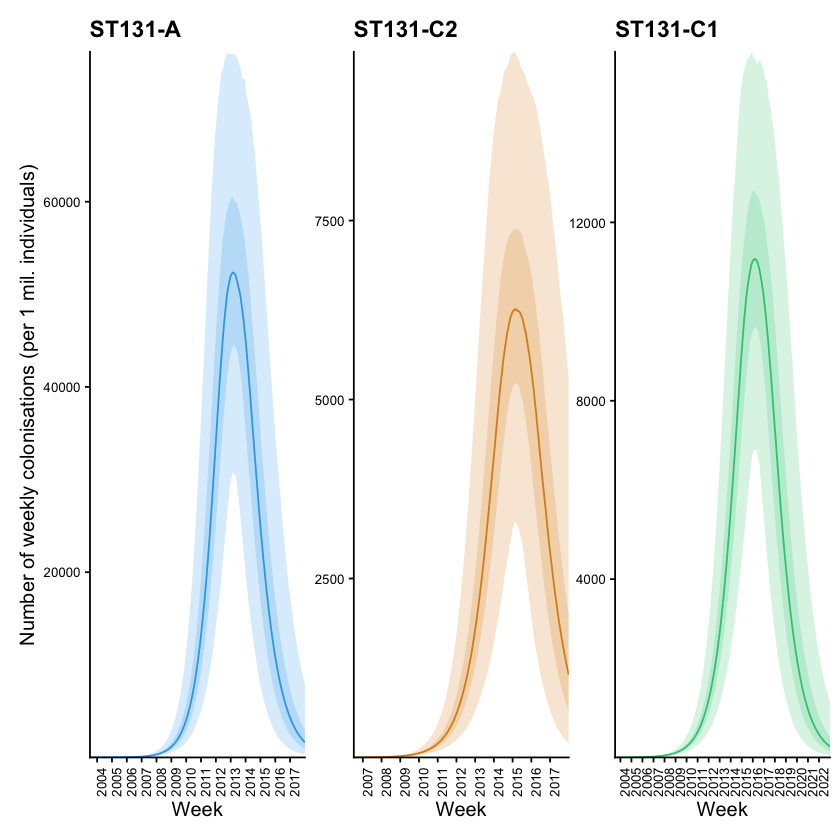

In [181]:
# Two colonisation curves in their own figures

max_year_A <- max(df_fit[df_fit$clade == "A", "Year"])
max_year_C2 <- max(df_fit[df_fit$clade == "C2", "Year"])
max_year_C1 <- max(df_fit[df_fit$clade == "C1", "Year"])
print(max_year_C2)

start_year_A <- 2004
start_year_C2 <- 2007
start_year_C1 <- 2004
n_obs_years_A <- 14
n_obs_years_C2 <- 11
n_obs_years_C2 <- 19
delay <- 26

clade_A_years <- seq(start_year_A, max_year_A, by = 1) 
clade_C2_years <- seq(start_year_C2, max_year_C2, by = 1)
clade_C1_years <- seq(start_year_C1, max_year_C1, by = 1)

clade_A_breaks <- seq(0, max(df_col[df_col$clade == "A", "week"]), by = 52)[1:length(clade_A_years)] + delay
clade_C2_breaks <- seq(0, max(df_col[df_col$clade == "C2", "week"]), by = 52)[1:length(clade_C2_years)] + delay
clade_C1_breaks <- seq(0, max(df_col[df_col$clade == "C1", "week"]), by = 52)[1:length(clade_C1_years)] + delay

p_col_A <- ggplot(df_col[which(df_col$clade == "A"),], aes(x = week, y = med), color = A_col, fill = A_col) +
        geom_ribbon(aes(ymin = cil50, ymax = ciu50),color = NA, fill = A_col, alpha = 0.2) +
        geom_ribbon(aes(ymin = cil, ymax = ciu),color = NA, fill = A_col, alpha = 0.2) +
        geom_line(aes(y = med, color = clade), color = A_col) +
        scale_x_continuous(breaks = clade_A_breaks, labels = clade_A_years) +
        coord_cartesian(expand = FALSE) +
        labs(x = "Week", y = "Number of weekly colonisations (per 1 mil. individuals)", title = "ST131-A") +
        theme(axis.text.x = element_text(angle = 90, size = ax_ticks_fs), axis.text.y = element_text(size = ax_ticks_fs))


p_col_C2 <- ggplot(df_col[which(df_col$clade == "C2"),], aes(x = week, y = med)) +
        geom_ribbon(aes(ymin = cil50, ymax = ciu50),color = NA, fill = C2_col, alpha = 0.2) +
        geom_ribbon(aes(ymin = cil, ymax = ciu),color = NA, fill = C2_col, alpha = 0.2) +
        geom_line(aes(y = med, color = clade), color = C2_col) +
        scale_x_continuous(breaks = clade_C2_breaks, labels = clade_C2_years) +
        coord_cartesian(expand = FALSE) +
        labs(x = "Week", y = "", title = "ST131-C2") +
        theme(legend.position = "none",
        plot.margin = unit(c(0, 0, 0, 0), "cm"), axis.text.y = element_text(size = ax_ticks_fs), axis.title.y = element_blank(), axis.text.x = element_text(angle = 90, size = ax_ticks_fs)) 

p_col_C1 <- ggplot(df_col[which(df_col$clade == "C1"),], aes(x = week, y = med)) +
        geom_ribbon(aes(ymin = cil50, ymax = ciu50),color = NA, fill = C1_col, alpha = 0.2) +
        geom_ribbon(aes(ymin = cil, ymax = ciu),color = NA, fill = C1_col, alpha = 0.2) +
        geom_line(aes(y = med, color = clade), color = C1_col) +
        scale_x_continuous(breaks = clade_C1_breaks, labels = clade_C1_years) +
        coord_cartesian(expand = FALSE) +
        labs(x = "Week", y = "", title = "ST131-C1") +
        theme(legend.position = "none",
        plot.margin = unit(c(0, 0, 0, 0), "cm"), axis.text.y = element_text(size = ax_ticks_fs), axis.title.y = element_blank(), axis.text.x = element_text(angle = 90, size = ax_ticks_fs)) 


p_col_A + p_col_C2 + p_col_C1

ggsave(p_col_A + p_col_C2 + p_col_C1, filename = paste(savedir, "colonisation.pdf", sep = ""), width = 10, height = 5, dpi = dpi_value)

# 11.4 or 8.7, width = 8.7, height = 8.7, units = "cm"

### Fig. S4: ST131-A Posterior

Posterior distributions, joint and marginal, for all parameters including $D_t$.

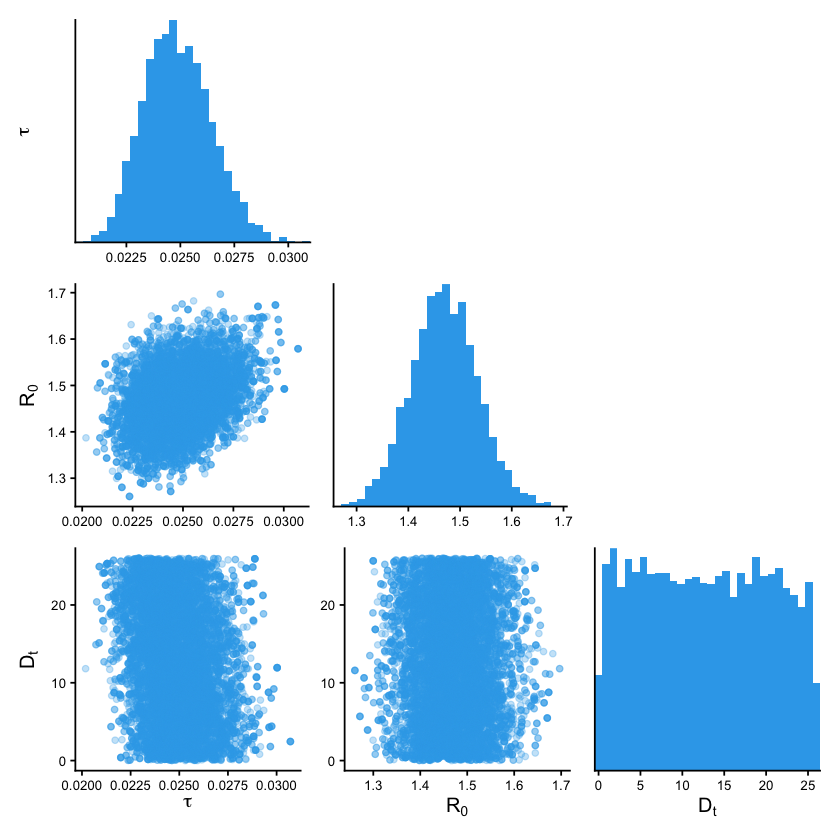

In [182]:
plot_pairs_joint_posterior <- function(df, col, alt_param = FALSE){
    #' plot_pairs style figure for the marginal and joint posteriors.
    #' @param df Data frame with posterior and prior draws for all clades
    #' @param col Color of the plot.
    #' @param alt_param If you want to plot the (beta, gamma) parametrization instead, set to TRUE.

    par1_name <- expression(tau)
    par2_name <- expression(R[0])
    
    if (alt_param){
        df$par1 <- df$par1*df$par2/(df$par2 - 1)
        df$par2 <- df$par1/(df$par2 - 1)
        par1_name <- expression(beta)
        par2_name <- expression(gamma)
    }
    
    df$Dt <- df$Dt*1000 # "Unscale" Dt parameter so that it is in weeks.
    
    p_par1 <- ggplot(df[which(df$distr == "Posterior"),], aes(x = par1)) +
        geom_histogram(position = "identity", bins = 30, fill = col) +
        labs(x = NULL, title = NULL, y = par1_name)+
        theme_cowplot(12) +
        coord_cartesian(expand = FALSE) +
        theme(axis.text.y = element_blank(), axis.ticks.y=element_blank(), axis.text.x = element_text(size = ax_ticks_fs))

    p_par2 <- ggplot(df[which(df$distr == "Posterior"),], aes(x = par2)) +
        geom_histogram(position = "identity", bins = 30, fill = col) +
        labs(x = NULL, title = NULL, y = NULL) +
        theme_cowplot(12) +
        coord_cartesian(expand = FALSE) +
        theme(axis.text.y = element_blank(), axis.ticks.y=element_blank(), axis.text.x = element_text(size = ax_ticks_fs))

    p_par1par2 <- ggplot(df[which(df$distr == "Posterior"),], aes(x = par1, y = par2)) +
        geom_point(alpha = 0.3, color = col) + 
        labs(title = NULL, x = NULL, y = par2_name) +
        theme_cowplot(12) +
        theme(axis.text.x = element_text(size = ax_ticks_fs), axis.text.y = element_text(size = ax_ticks_fs))

    
    p_Dt <- ggplot(df[which(df$distr == "Posterior"),], aes(x = Dt)) +
        geom_histogram(position = "identity", bins = 30, fill = col) +
        labs(x = expression(D[t]), title = NULL, y = NULL) +
        theme_cowplot(12) +
        coord_cartesian(expand = FALSE) +
        theme(axis.text.y = element_blank(), axis.ticks.y=element_blank(), axis.text.x = element_text(size = ax_ticks_fs))

    p_par1_Dt <- ggplot(df[which(df$distr == "Posterior"),], aes(x = par1, y = Dt)) +
        geom_point(alpha = 0.3, color = col) + 
        labs(title = NULL, x = par1_name, y = expression(D[t])) +
        theme_cowplot(12) +
        theme(axis.text.x = element_text(size = ax_ticks_fs), axis.text.y = element_text(size = ax_ticks_fs))

    p_par2_Dt <- ggplot(df[which(df$distr == "Posterior"),], aes(x = par2, y = Dt)) +
        geom_point(alpha = 0.3, color = col) + 
        labs(title = NULL, x = par2_name, y = NULL) +
        theme_cowplot(12) +
        theme(axis.text.x = element_text(size = ax_ticks_fs), axis.text.y = element_text(size = ax_ticks_fs))


    return((p_par1 + plot_spacer() + plot_spacer())/
        (p_par1par2 + p_par2 + plot_spacer())/
        (p_par1_Dt + p_par2_Dt + p_Dt))
}


plot_pairs_joint_posterior(df_A, A_col)

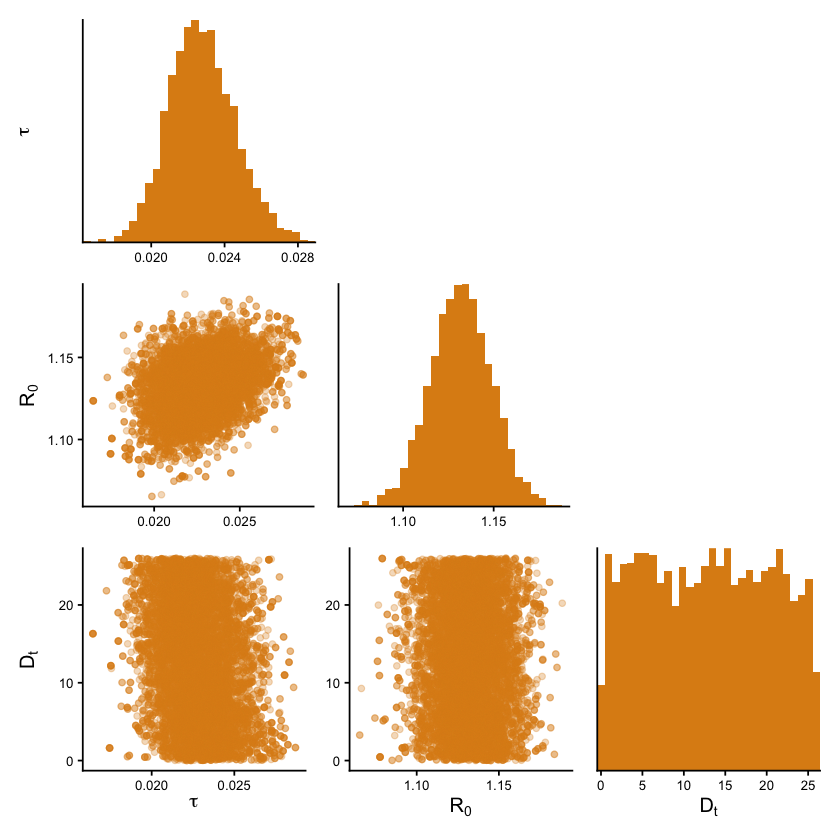

In [183]:
plot_pairs_joint_posterior(df_C2, C2_col)

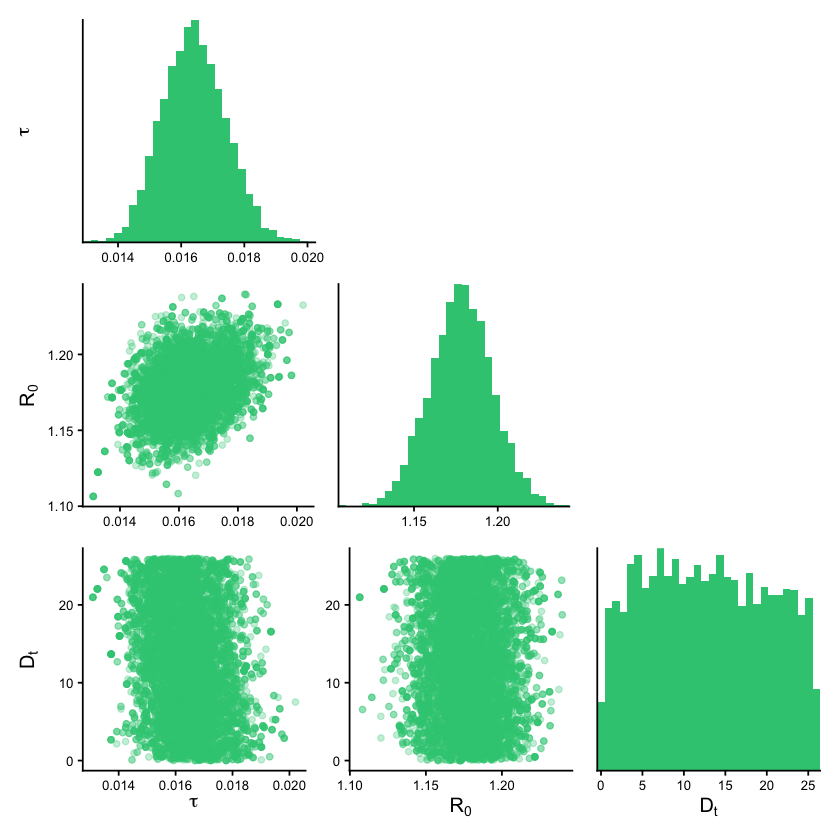

In [184]:
plot_pairs_joint_posterior(df_C1, C1_col)

# Comparison of parametrization

Comparison of the parametrization: posterior pairplot parametrized with the transmission coefficient $\beta$ and the recovery rate $\gamma$.

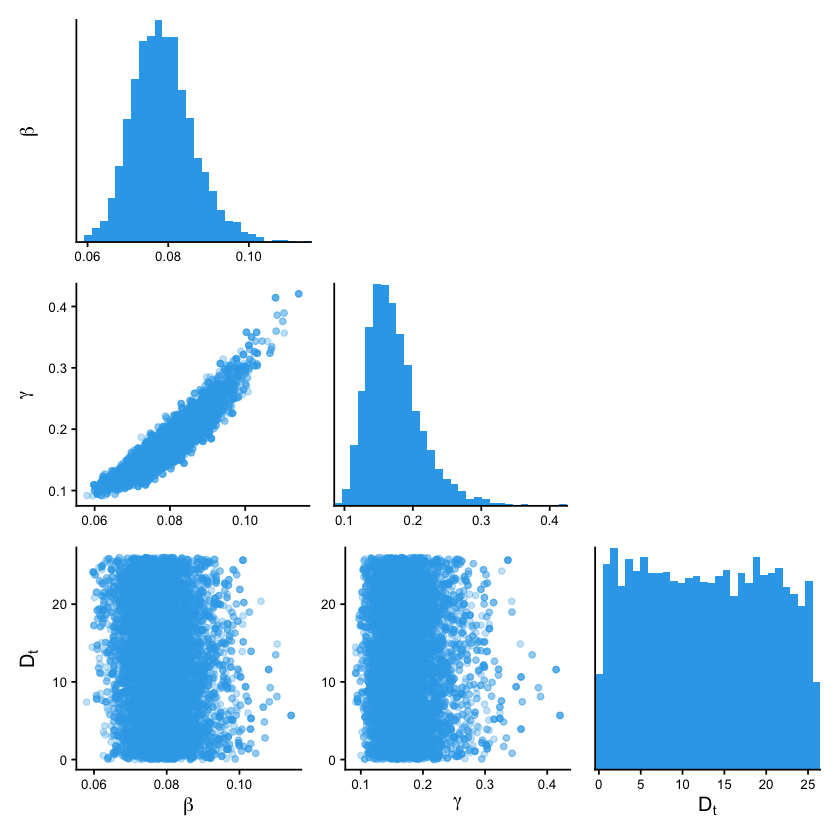

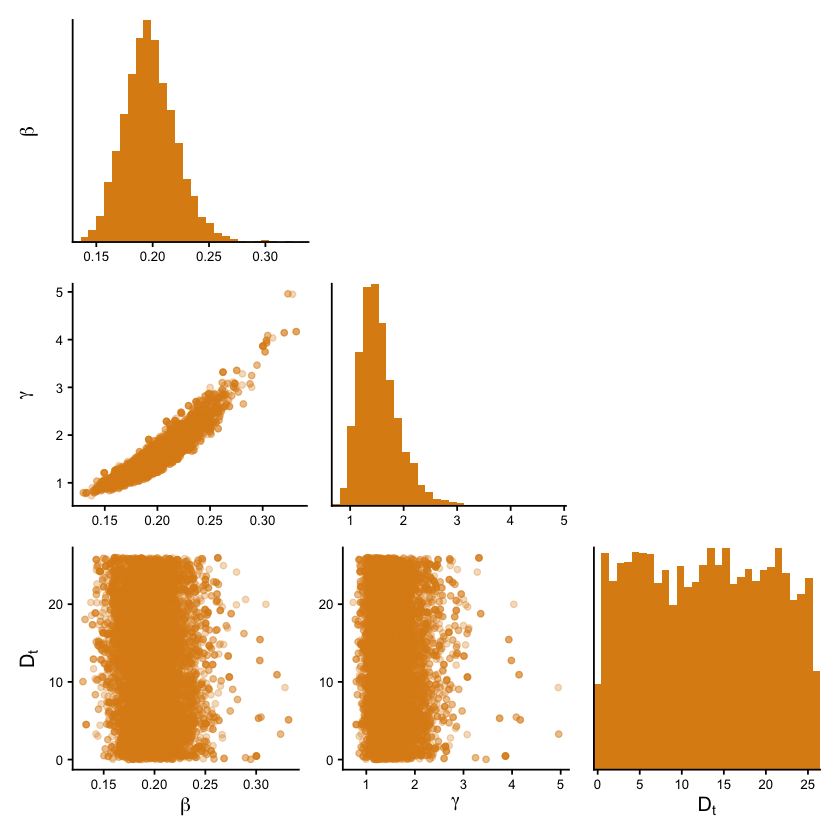

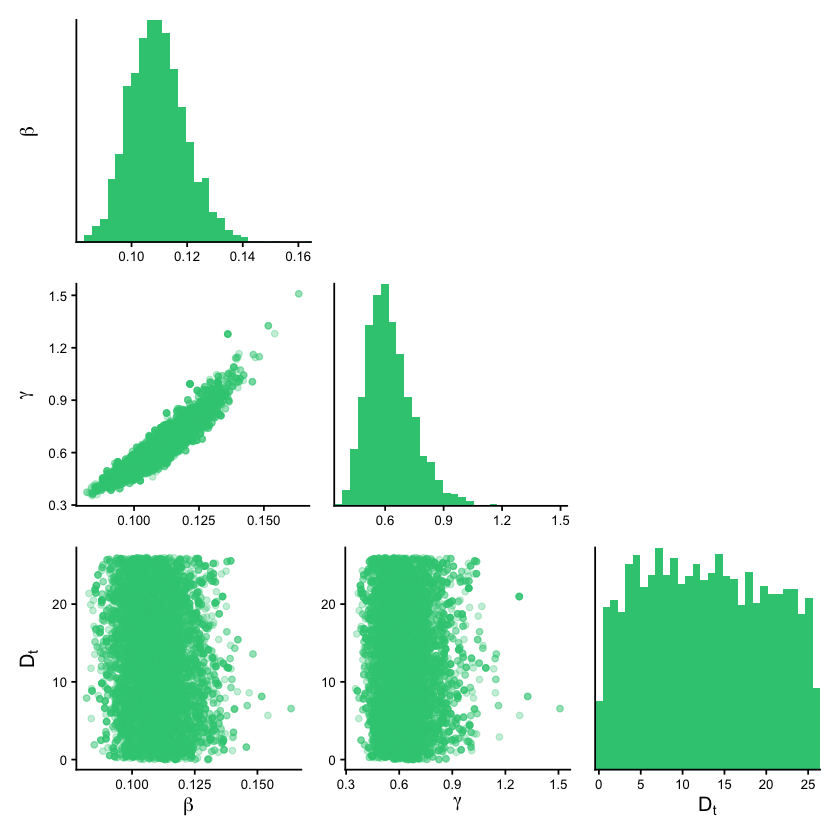

In [185]:
pA <- plot_pairs_joint_posterior(df_A, A_col, alt_param = TRUE)
pC2 <- plot_pairs_joint_posterior(df_C2, C2_col, alt_param = TRUE)
pC1 <- plot_pairs_joint_posterior(df_C1, C1_col, alt_param = TRUE)

pA
pC2
pC1

ggsave(pA, filename = paste(savedir, "pairs_bg_clade_A.pdf", sep = ""), width = 17.8, height = 17.8, units = "cm", dpi = dpi_value)
ggsave(pC2, filename = paste(savedir, "pairs_bg_clade_C2.pdf", sep = ""), width = 17.8, height = 17.8, units = "cm", dpi = dpi_value)
ggsave(pC1, filename = paste(savedir, "pairs_bg_clade_C1.pdf", sep = ""), width = 17.8, height = 17.8, units = "cm", dpi = dpi_value)




# Diagnostics

## Discrepancies for SMC populations

In [186]:
# Load the population data:

load_pop_data <- function(dirs, clade_labels){
    #' Load ABC-SMC threshold population data from directories in dirs and return a data frame
    #' @param dirs Result directories.
    #' @param clade_labels Clade labels.

    #pop_df <- data.frame("par1" = c(), "par2" = c(), "Dt" = c(), "eps" = c(), "Clade" = c())
    
    for (i in 1:length(dirs)){
        temp_pop_df <- read.csv(paste(dirs[i], "result_pop_samples.csv", sep = ""))
        temp_pop_df$Clade <- rep(clade_labels[i], dim(temp_pop_df)[1])
        temp_colnames <- colnames(temp_pop_df)
        if(i == 1){
            pop_df <- data.frame(matrix(ncol = length(colnames(temp_pop_df)), nrow = 0))
            colnames(pop_df) <- colnames(temp_pop_df)
        }
        if (length(setdiff(temp_colnames, colnames(pop_df))) != 0){ # If Dt is missing from one triple, add it to pop_df
            missing_var <- setdiff(temp_colnames, colnames(pop_df))
            pop_df[,missing_var] <- rep(NA, dim(pop_df)[1])
        }
        pop_df <- rbind(pop_df, temp_pop_df)
    }

    pop_df$eps <- round(pop_df$eps, 1)
    pop_df$eps <- as.character(pop_df$eps)

    return(pop_df)
    
}

pop_df <- load_pop_data(c(dir_A, dir_C2, dir_C1), clade_labels = c("ST131-A", "ST131-C2", "ST131-C1"))
head(pop_df)



par1       par2     Dt          eps Clade  
1 0.01874266 1.514761 0.020117154 1   ST131-A
2 0.02445859 1.253541 0.022731562 1   ST131-A
3 0.08169859 2.004398 0.003306283 1   ST131-A
4 0.02107504 1.876757 0.021164883 1   ST131-A
5 0.02863888 1.117142 0.003815437 1   ST131-A
6 0.02666418 1.666476 0.012933904 1   ST131-A

Saving 7 x 7 in image


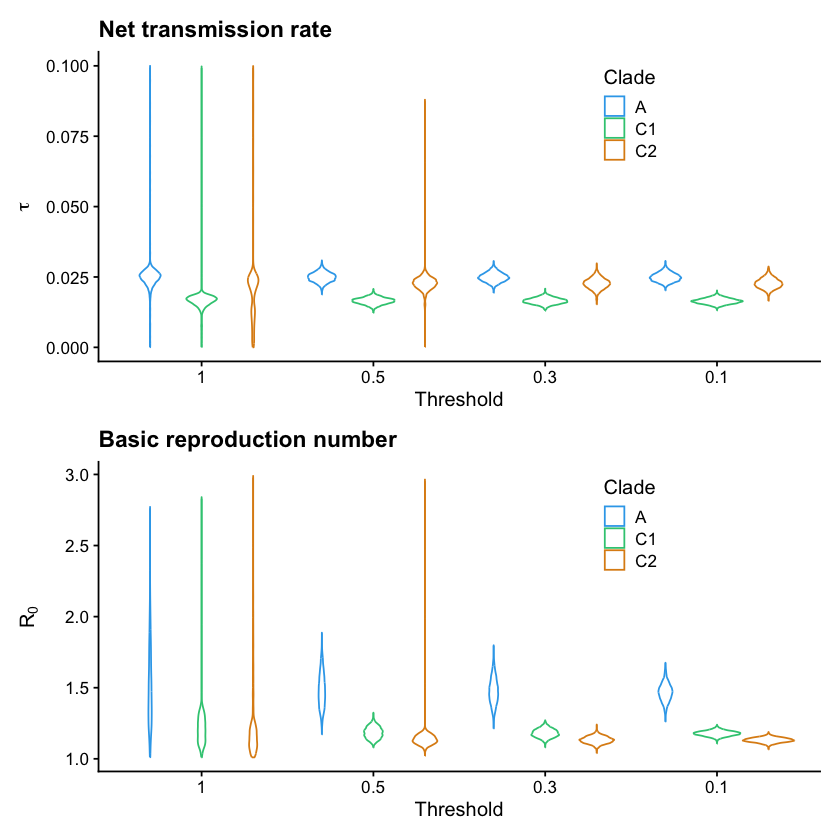

In [187]:
# Violin plot

plot_convergence_plot <- function(pop_df, par, title, ylab){
    #' Violin plot for convergence of a parameter.
    #' @param pop_df Data frame containing posterior parameter estimates for all ABC-SMC threshold populations.
    #' @param title Title of the figure.
    #' @param ylab Y-axis label.
    
    par <- sym(par)
    
    p <- ggplot(pop_df, aes(x = eps, y = !!par, color = Clade)) +
        geom_violin() +
        #geom_boxplot() +
        #geom_boxplot(outlier.shape = NA) +
        #geom_jitter(data = outliers, position = position_jitterdodge(jitter.width = 0.2, jitter.height = 0, dodge.width = 0.8), size = 0.5) +
        labs(y = ylab, x = "Threshold", title = title) +
        scale_x_discrete(limits = rev) +
        scale_color_manual(labels = c("A", "C1", "C2"), values = c(A_col, C1_col, C2_col)) +
        #scale_fill_manual(labels = c("A", "C1", "C2"), values = c(A_col, C1_col, C2_col)) +
        theme(legend.position = c(0.7, 0.8))

    return(p)
}

p1 <- plot_convergence_plot(pop_df, "par1", "Net transmission rate", expression(tau))
p2 <- plot_convergence_plot(pop_df, "par2", "Basic reproduction number", expression(R[0]))

p1 / p2

ggsave(p1 / p2, filename = paste(savedir, "inference_boxplot.pdf", sep = ""), dpi = dpi_value)

## Prior sensitivity historgram

Saving 7 x 7 in image


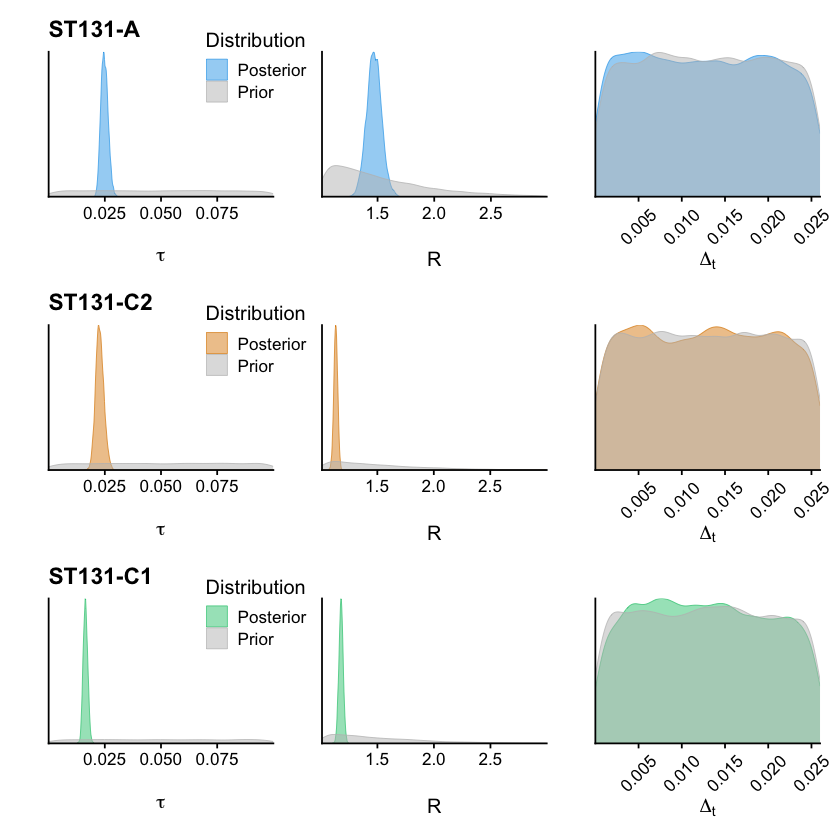

In [189]:
# Plot the density of the prior and posterior


plot_prior_sensitivity <- function(df, col, p1_title = "NA"){
    #' Plot the posterior and prior distributions for each parameter as a density plot
    #' @param df Data frame with prior and posterior draws for each parameter.
    #' @param col Color of the density plot.
    #' @param p1_title Title, placed on the first of the three plots.
    
    p1 <- ggplot(df, aes(x = par1, fill = distr)) +
        geom_density(aes(color = distr), linewidth = 0.2, alpha = 0.5) +
        scale_fill_manual(name = "Distribution", values = c(col, "grey"), labels = c("Posterior", "Prior")) + 
        scale_color_manual(name = "Distribution", values = c(col, "grey"), labels = c("Posterior", "Prior")) + 
        labs(x = expression(tau), y = "", title = p1_title) +
        coord_cartesian(expand = FALSE) +
        theme(legend.position = c(0.7, 0.9), axis.text.y = element_blank(),
              axis.ticks.y = element_blank())
    
    p2 <- ggplot(df, aes(x = par2, fill = distr)) +
        geom_density(aes(color = distr), linewidth = 0.2, alpha = 0.5) +
        scale_fill_manual(name = "Distribution", values = c(col, "grey"), labels = c("Posterior", "Prior")) + 
        scale_color_manual(name = "Distribution", values = c(col, "grey"), labels = c("Posterior", "Prior")) + 
        labs(x = "R", y = "", title = "") +
        coord_cartesian(expand = FALSE) +
        theme(legend.position="none", axis.text.y = element_blank(),
              axis.ticks.y = element_blank())
    
    
    p3 <- ggplot(df, aes(x = Dt, fill = distr)) +
        geom_density(aes(color = distr), linewidth = 0.2, alpha = 0.5) +
        scale_fill_manual(name = "Distribution", values = c(col, "grey"), labels = c("Posterior", "Prior")) + 
        scale_color_manual(name = "Distribution", values = c(col, "grey"), labels = c("Posterior", "Prior")) + 
        labs(x = expression(Delta[t]), y = "", title = "") +
        coord_cartesian(expand = FALSE) +
        theme(legend.position="none", axis.text.y = element_blank(), axis.ticks.y = element_blank(), axis.text.x = element_text(angle = 45, vjust = 0.5))
    
    
    p1 + p2 + p3

}


p_A_prior <- plot_prior_sensitivity(df_A, A_col, p1_title = "ST131-A")

p_C2_prior <- plot_prior_sensitivity(df_C2, C2_col, p1_title = "ST131-C2")

p_C1_prior <- plot_prior_sensitivity(df_C1, C1_col, p1_title = "ST131-C1")

p_A_prior / p_C2_prior / p_C1_prior


ggsave(p_A_prior / p_C2_prior / p_C1_prior, filename = paste(savedir, "sensitivity/prior_sensitivity_dens.pdf", sep = ""), create.dir = TRUE, dpi = dpi_value)




## Sensitivity analysis: impact of $\rho_c$ and $\Delta_t$

The impact of the delay parameter $\Delta_t$ and the estimated odds ratio $\rho_c$ for a given clade $c$. Here, $R_0$ and fit to data are compared between different values of $\rho_c$ and different priors for the delay parameter. 
- For $\rho_c$, we compare $R_0$ for its mean value (used in the main results) and the 95% CIs for the estimated odds ratio (lower and upper interval). These estimates vary by clade.
- For $\Delta_t$, we compare three potential delay patterns: no delay at all, a delay of 0.5 years (used in main results), a delay of 5 years and a delay of 10 years.



### Sensitivity analysis for $\rho_c$

In [190]:
dir_OR_lower_A <- "res/final_res/A_results/sensitivity/clade_A_2025-06-16_14-08-39_10k_OR_lower/csvs/"
dir_OR_upper_A <- "res/final_res/A_results/sensitivity/clade_A_2025-06-16_13-23-29_10k_OR_upper/csvs/"
dir_OR_lower_C2 <- "res/final_res/C2_results/sensitivity/clade_C2_2025-06-16_14-37-12_10k_OR_lower/csvs/"
dir_OR_upper_C2 <- "res/final_res/C2_results/sensitivity/clade_C2_2025-06-16_12-06-27_10k_OR_upper/csvs/"

# TODO: update
dir_OR_lower_C1 <- "res/final_res/C1_results/sensitivity/clade_C1_2025-07-02_20-00-07_OR_lower_10k/csvs/"
dir_OR_upper_C1 <- "res/final_res/C1_results/sensitivity/clade_C1_2025-07-02_20-43-27_OR_upper_10k/csvs/"

dirs_OR_A <- c(dir_OR_lower_A, dir_A, dir_OR_upper_A)
dirs_OR_C2 <- c(dir_OR_lower_C2, dir_C2, dir_OR_upper_C2)
dirs_OR_C1 <- c(dir_OR_lower_C1, dir_C1, dir_OR_upper_C1)


In [191]:
library("readxl")

get_OR_for_clade <- function(clade, OR_type){
    # clade (str): clade of interest; A, C2 or C1
    # OR_type (str): lower, upper or mean

    print(OR_type)
    if (!OR_type %in% c("lower", "upper")){
        print("Using default estimate.")
        OR_type = "OR"
    }

    collection <- "BSAC2"
    OR_data <- read_excel("data/ST131_clades_OR_E_coli_carriage_disease_collapsed_wBSAC2.xlsx")

    
    return(as.numeric(OR_data[which(OR_data$Collection == collection & OR_data$Clade == clade), OR_type]))
    
}

get_post_samples_triple <- function(dirs, var, var_categories){
    # Get posterior samples for sensitivity analysis for variable 'var'
    
    read_post_sample <- function(dir){
        post_samples <- read.csv(paste0(dir, "result_samples.csv"))
        post_samples <- post_samples[, c("par1", "par2")]
        post_samples
    }
    post_samples_1 <- read_post_sample(dirs[1])
    post_samples_2 <- read_post_sample(dirs[2])
    post_samples_3 <- read_post_sample(dirs[3])

    post_samples <- rbind(post_samples_1, post_samples_2, post_samples_3)
    post_samples[,var] <- c(rep(var_categories[1], dim(post_samples_1)[1]),
                            rep(var_categories[2], dim(post_samples_2)[1]),
                            rep(var_categories[3], dim(post_samples_3)[1]))

    colnames(post_samples)[colnames(post_samples) == "par2"] <- "R0"

    post_samples
}


plot_post_samples_OR <- function(clade, dir_OR_mean, dir_OR_lower, dir_OR_upper, legend = TRUE){

    #post_samples_OR <- get_post_samples_OR(dir_OR_mean, dir_OR_lower, dir_OR_upper)
    post_samples_OR <- get_post_samples_triple(c(dir_OR_lower, dir_OR_mean, dir_OR_upper), "OR", c("lower", "mean", "upper"))
    
    legend_position = "none"
    if(legend){
        legend_position = c(0.6, 0.8)
    }


    lower_OR_label <- formatC(signif(get_OR_for_clade(clade, "lower"), 2), format = "f", digits = 1)
    mean_OR_label <- formatC(signif(get_OR_for_clade(clade, "mean"), 2), format = "f", digits = 1)
    upper_OR_label <- formatC(signif(get_OR_for_clade(clade, "upper"), 2), format = "f", digits = 1)
    
    p_R0_OR <- ggplot(post_samples_OR, aes(fill = OR, x = R0)) +
    labs(title = paste0("Clade ", clade), x = expression(R[0]), y = "") +
    coord_cartesian(expand = FALSE) +
    geom_density(aes(color = OR), alpha = 0.5) +
    scale_fill_manual(name = expression(rho[c]), values = c("yellow", "blue", "red"), labels = c(lower_OR_label, mean_OR_label, upper_OR_label)) +
    scale_color_manual(name = expression(rho[c]), values = c("yellow", "blue", "red"), labels = c(lower_OR_label, mean_OR_label, upper_OR_label)) +
    theme(legend.position = legend_position, axis.ticks.y=element_blank(), axis.text.x = element_text(angle = 45, size = x_ax_fs, vjust = 0.5), axis.text.y = element_blank(), axis.title.y = element_text(size = 10))

    p_R0_OR
}

In [192]:
# Forest plot for OR sensitivity

get_forest_plot_df <- function(post_samples, variables, sens_var, clade){

    forest_plot_df <- data.frame("variable" = c(), "mean" = c(), "cil95" = c(), "ciu95" = c(), sens_var = c())
    a <- 0.95
    for (var in variables){
        for (sv in unique(post_samples[,sens_var])){
            sv_sample <- post_samples[which(post_samples[,sens_var] == sv),]
            cis95 <- quantile(sv_sample[,var], c((1-a)/2, 1 - (1-a)/2))
            mean_sv <- mean(sv_sample[,var])
            df <- data.frame("variable" = var, "mean" = mean_sv, "cil95" = cis95[1],
                                                  "ciu95" = cis95[2], sens_var = sv)
            forest_plot_df <- rbind(forest_plot_df, df)
        }
    }

    forest_plot_df$Clade <- rep(clade, dim(forest_plot_df)[1])

    return(forest_plot_df)
}




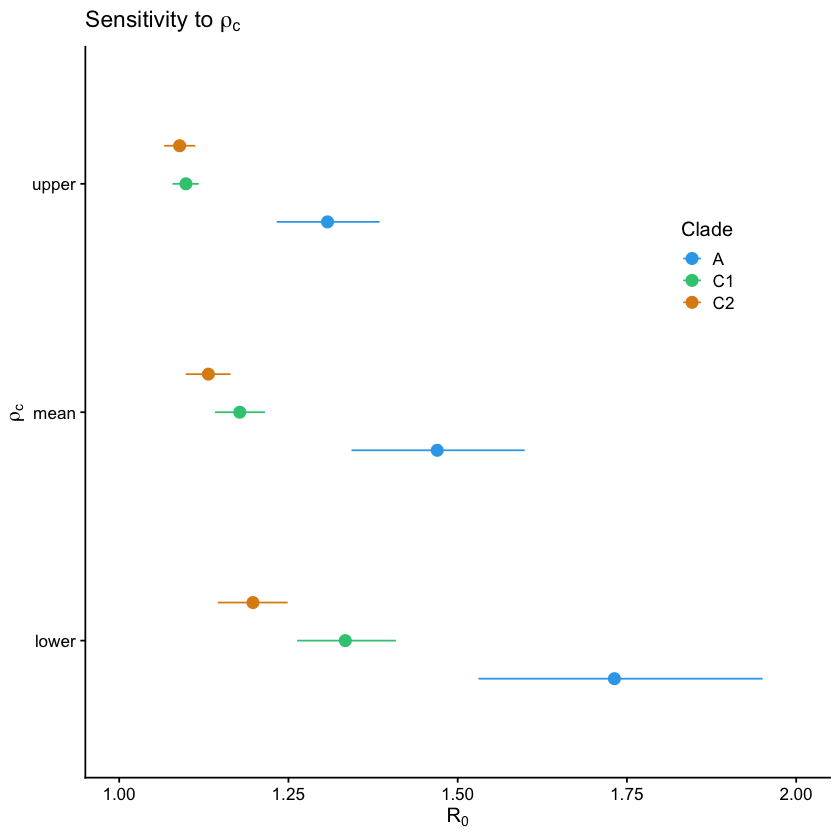

In [199]:
post_samples_OR_A <- get_post_samples_triple(dirs_OR_A, "OR", c("lower", "mean", "upper"))
OR_forest_plot_df <- get_forest_plot_df(post_samples_OR_A, c("par1", "R0"), "OR", "A")

post_samples_OR_C2 <- get_post_samples_triple(dirs_OR_C2, "OR", c("lower", "mean", "upper"))
OR_forest_plot_df <- rbind(OR_forest_plot_df, get_forest_plot_df(post_samples_OR_C2, c("par1", "R0"), "OR", "C2"))

post_samples_OR_C1 <- get_post_samples_triple(dirs_OR_C1, "OR", c("lower", "mean", "upper"))
OR_forest_plot_df <- rbind(OR_forest_plot_df, get_forest_plot_df(post_samples_OR_C1, c("par1", "R0"), "OR", "C1"))

p_OR_R0 <- ggplot(OR_forest_plot_df[which(OR_forest_plot_df$variable == "R0"),], aes(x = mean, y = sens_var, color = Clade)) +
    geom_point(size = 3, position = position_dodge(width = 0.5)) +
    coord_cartesian(xlim = c(1, 2)) + 
    geom_errorbarh(aes(xmin = cil95, xmax = ciu95), height = 0, position = position_dodge(width = 0.5)) +
    scale_color_manual(labels = c("A", "C1", "C2"), values = c(A_col, C1_col, C2_col)) +
    #labs(title = "Sensitivity to OR", x = expression(R[0]), y = expression(rho[c]))
    labs(title = expression(paste("Sensitivity to ", rho[c])), x = expression(R[0]), y = expression(rho[c])) +
    theme(legend.position = c(0.8, 0.7))
    #title = expression(paste("Sensitivity to ", rho[c])
p_OR_R0

ggsave(p_OR_R0, filename = paste(savedir, "sensitivity/OR_sensitivity_R0.pdf", sep = ""), width = 8, height = 8, units = "cm", dpi = dpi_value)


In [195]:
# Fit for each value in the same figure

combine_triple_fit <- function(dirs, clade, var, var_categories = c("1st", "2nd", "3rd"), years = obs_data$Year){
    # combine sensitivity analysis fit for three values of a variable

    pred_1 <- read.csv(paste(dirs[1], "BSI_yearly_node.csv", sep = ""))
    pred_2 <- read.csv(paste(dirs[2], "BSI_yearly_node.csv", sep = ""))
    pred_3 <- read.csv(paste(dirs[3], "BSI_yearly_node.csv", sep = ""))

    df_fit_1 <- get_cis(pred_1, years, a = 0.95)
    df_fit_2 <- get_cis(pred_2, years, a = 0.95)
    df_fit_3 <- get_cis(pred_3, years, a = 0.95)

    df_fit <- rbind(df_fit_1, df_fit_2, df_fit_3)
    df_fit$clade <- rep(clade, dim(df_fit)[1])
    df_fit[,var] <- rep(var_categories, each = dim(df_fit_1)[1])
    df_fit$Data <- rep("Estimated", dim(df_fit)[1])

    # add in observed data
    if (clade %in% c("C2")){
        df_obs <- mutate_obs_data(obs_data[4:14,], clade)
    }else{
        df_obs <- mutate_obs_data(obs_data, clade)
    }

    df_obs[,var] <- rep(NA, dim(df_obs)[1])
    df_fit <- df_fit[,c("med", "Year", "clade", "cil", "ciu",
                        "cil50", "ciu50", "cil100", "ciu100", "Data", var)]
    df_fit <- rbind(df_fit, df_obs)
    
    return(df_fit)

    

}

df_OR_fit_A <- combine_triple_fit(dirs_OR_A, "A",
                                  var = "OR", var_categories = c("lower", "mean", "upper"))
df_OR_fit_C2 <- combine_triple_fit(dirs_OR_C2, "C2",
                                   var = "OR", var_categories = c("lower", "mean", "upper"),
                                   years = 2007:2017) # 2007:2017
df_OR_fit_C1 <- combine_triple_fit(dirs_OR_C1, "C1",
                                   var = "OR",
                                   var_categories = c("lower", "mean", "upper"),
                                   years = 2004:2022)
df_OR_fit <- rbind(df_OR_fit_A, df_OR_fit_C2, df_OR_fit_C1)

In [196]:
head(df_OR_fit)

med Year clade cil ciu cil50 ciu50 cil100 ciu100 Data      OR   
X0 5   2004 A     10  1   7     4     15     0      Estimated lower
X1 5   2005 A     10  1   7     4     16     0      Estimated lower
X2 5   2006 A     10  1   7     4     17     0      Estimated lower
X3 5   2007 A     10  1   7     4     17     0      Estimated lower
X4 5   2008 A     10  1   7     4     19     0      Estimated lower
X5 6   2009 A     11  2   7     4     17     0      Estimated lower

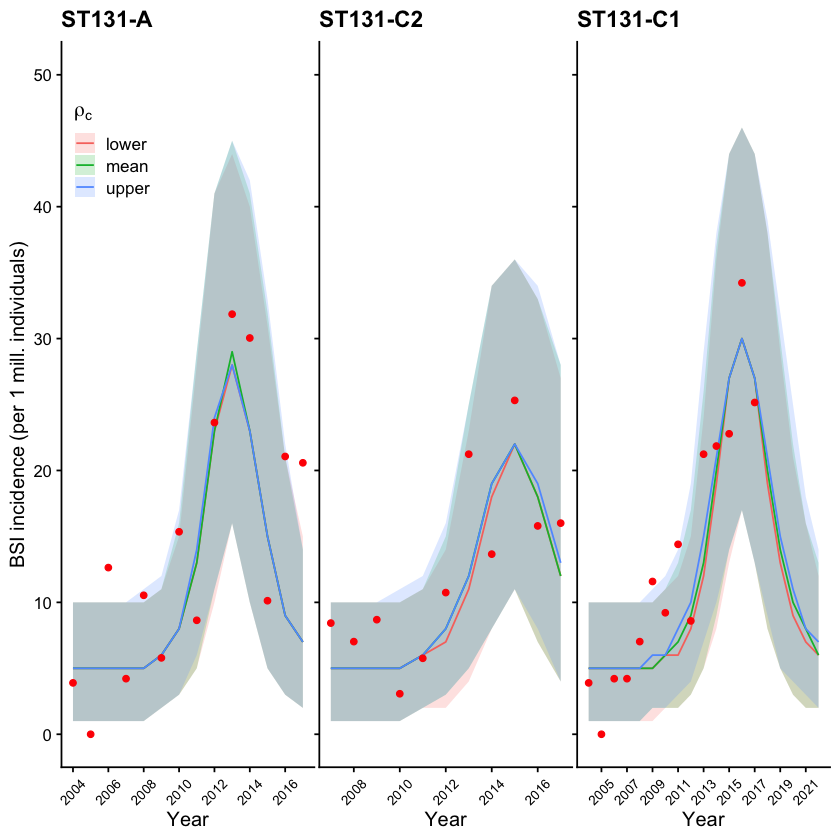

In [265]:
library("rlang")

plot_fit <- function(df_fit, clade, y_lim_max, var = "OR", include_CI50 = FALSE){

    var_sym <- sym(var)

    fig_labels <- as.character(obs_data$Year)
    fig_breaks <- seq(min(obs_data$Year), max(obs_data$Year), 2)
    
    if(clade == "C1"){
        fig_labels <- c(as.character(obs_data$Year), as.character(c(2005:2022)))
        fig_breaks <- seq(2005, 2022, 2) #c(obs_data$Year, 2005:2022)
    }
    
    p_fit <- ggplot(df_fit[which(df_fit$clade == clade & df_fit$Data == "Estimated"),],
                    aes(x = Year, y = med)) +
        geom_ribbon(aes(ymin = cil, ymax = ciu, fill = !!var_sym), alpha = 0.2) +
        geom_line(aes(color = !!var_sym)) +
        geom_point(data = df_fit[which(df_fit$clade == clade & df_fit$Data == "Observed"),], 
                   aes(y = med), color = "red") +
        labs(y = "BSI incidence (per 1 mill. individuals)", title = paste0("ST131-", clade), color = expression(rho[c]), fill = expression(rho[c])) +
        scale_x_continuous("Year", breaks = fig_breaks) +
        coord_cartesian(ylim = c(0, y_lim_max)) +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5, size = 8),
              axis.text.y = element_text(size = 10),
              legend.position = c(0.05, 0.85),
              plot.margin = unit(c(0, 0, 0, 0), "cm"), legend.spacing.y = unit(0, "pt"), legend.margin = margin(0, 0, 0, 0))

    if (include_CI50){
        p_fit <- p_fit +         
        geom_ribbon(aes(ymin = cil50, ymax = ciu50, fill = !!var_sym), alpha = 0.2)
    }
    p_fit
}

p_fit_A <- plot_fit(df_OR_fit, "A", 50, var = "OR")
p_fit_C2 <- plot_fit(df_OR_fit, "C2", 50, var = "OR") + theme(legend.position = "none",
                                                              axis.title.y = element_blank(),
                                                              axis.text.y = element_blank())
p_fit_C1 <- plot_fit(df_OR_fit, "C1", 50, var = "OR") + theme(legend.position = "none",
                                                              axis.title.y = element_blank(),
                                                              axis.text.y = element_blank())




p_fit_A + p_fit_C2 + p_fit_C1
ggsave(p_fit_A + p_fit_C2 + p_fit_C1, filename = paste(savedir, "sensitivity/OR_sensitivity_fit.pdf", sep = ""), width = 16, height = 8, units = "cm", dpi = dpi_value)





In [266]:
# Table for clarity:

get_summary <- function(post_samples_OR, OR, param){
    # Get the mean, median and 95% CI for a given parameter and clade
    # Returns a data frame
    
    df <- post_samples_OR
    d <- 3
    sp <- '%#.3g'
    if(param == "R0"){
        d <- 3
        sp <- '%#.3g'}
    mu <- sprintf(sp, signif(mean(df[, param]), digits = d))
    med <- sprintf(sp, signif(median(df[, param]), digits = d))
    ci95 <- quantile(df[, param], probs = c(0.0025, 0.975))

    tab <- data.frame("OR" = OR, "param" = param,
    "mean" = mu, "median" = med,
    "ci95_lower" = sprintf(sp,signif(ci95["0.25%"], digits = 3)), "ci95_upper" = sprintf(sp,signif(ci95["97.5%"], digits = 2)))

    return(tab)
}


get_OR_table <- function(post_samples_OR, OR){

    table_OR_lower <- get_summary(post_samples_OR[which(post_samples_OR$OR == "lower"),], "lower", "R0")
    table_OR_mean <- get_summary(post_samples_OR[which(post_samples_OR$OR == "mean"),], "mean", "R0")
    table_OR_upper <- get_summary(post_samples_OR[which(post_samples_OR$OR == "upper"),], "upper", "R0")

    table_OR <- rbind(table_OR_lower, table_OR_mean, table_OR_upper)

    table_OR
    
}

print("Clade A:")
get_OR_table(post_samples_OR_A)

print("Clade C2:")
get_OR_table(post_samples_OR_C2)

print("Clade C1:")
get_OR_table(post_samples_OR_C1)



[1] "Clade A:"


OR    param mean median ci95_lower ci95_upper
1 lower R0    1.73 1.73   1.45       2.00      
2 mean  R0    1.47 1.47   1.29       1.60      
3 upper R0    1.31 1.31   1.20       1.40

[1] "Clade C2:"


OR    param mean median ci95_lower ci95_upper
1 lower R0    1.20 1.20   1.12       1.20      
2 mean  R0    1.13 1.13   1.08       1.20      
3 upper R0    1.09 1.09   1.06       1.10

[1] "Clade C1:"


OR    param mean median ci95_lower ci95_upper
1 lower R0    1.33 1.33   1.23       1.40      
2 mean  R0    1.18 1.18   1.12       1.20      
3 upper R0    1.10 1.10   1.07       1.10

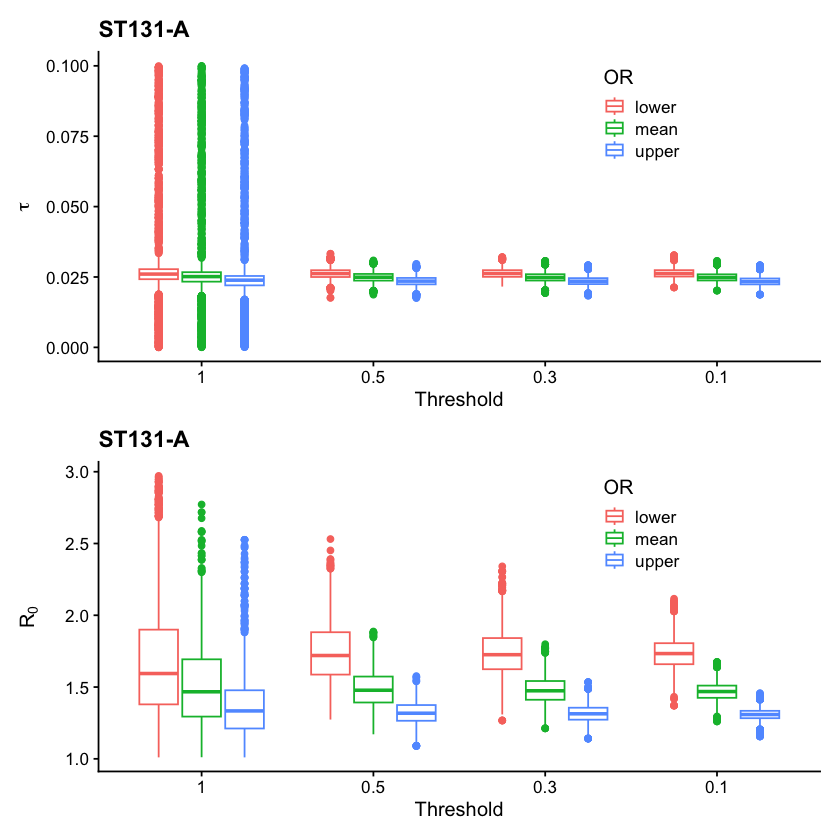

In [267]:
# Convergence of lower and upper OR

plot_pop_df <- function(pop_df, par, title = "NA", legend_title = "NA"){

    par <- sym(par)

    if (par == "par1"){
        ylab = expression(tau)
    }else{
        ylab = expression(R[0])
    }
    p1 <- ggplot(pop_df, aes(x = eps, y = !!par, color = Clade)) +
        geom_boxplot() +
        labs(y = ylab, x = "Threshold", title = title) +
        scale_x_discrete(limits = rev) +
        guides(fill=guide_legend(title = legend_title)) +
        scale_color_discrete(name = legend_title) +
        theme(legend.position = c(0.7, 0.8))

    p1
}

# Clade A
pop_df_OR_A <- load_pop_data(dirs_OR_A, clade_labels = c("lower", "mean", "upper"))

p_conv_par1 <- plot_pop_df(pop_df_OR_A, "par1", title = "ST131-A", legend_title = "OR")
p_conv_par2 <- plot_pop_df(pop_df_OR_A, "par2", title = "ST131-A", legend_title = "OR")

p_conv_par1/p_conv_par2

ggsave(p_conv_par1/p_conv_par2, filename = paste(savedir, "sensitivity/OR_sensitivity_convergence_A.pdf", sep = ""), width = 16, height = 10, units = "cm", dpi = dpi_value)



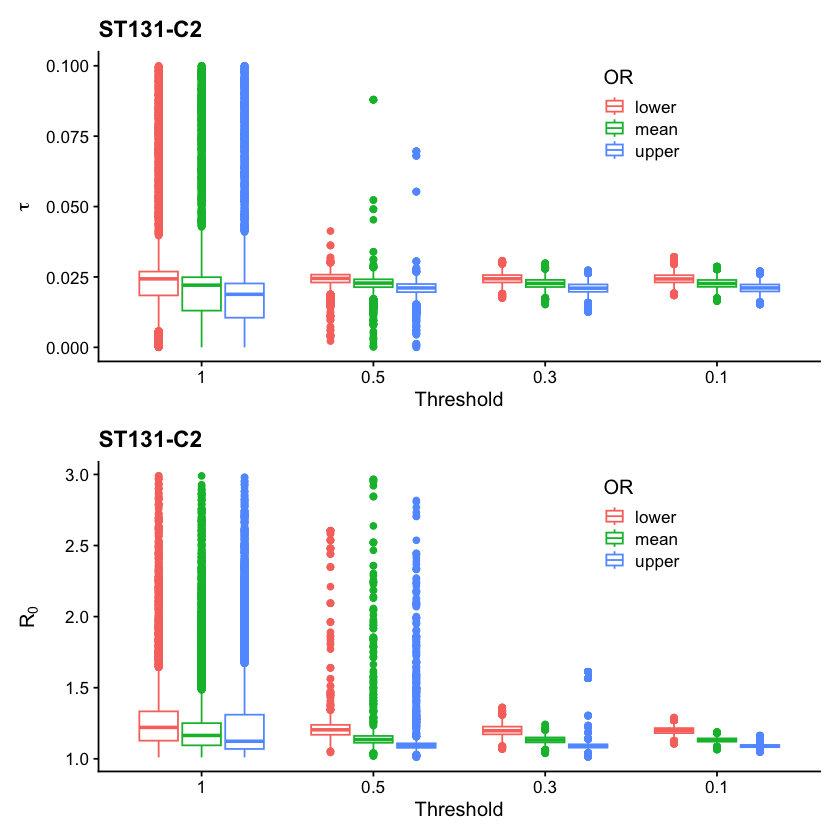

In [268]:
# Clade C2
pop_df_OR_C2 <- load_pop_data(dirs_OR_C2, clade_labels = c("lower", "mean", "upper"))

p_conv_par1 <- plot_pop_df(pop_df_OR_C2, "par1", title = "ST131-C2", legend_title = "OR")
p_conv_par2 <- plot_pop_df(pop_df_OR_C2, "par2", title = "ST131-C2", legend_title = "OR")

p_conv_par1/p_conv_par2

ggsave(p_conv_par1/p_conv_par2, filename = paste(savedir, "sensitivity/OR_sensitivity_convergence_C2.pdf", sep = ""), width = 16, height = 10, units = "cm", dpi = dpi_value)


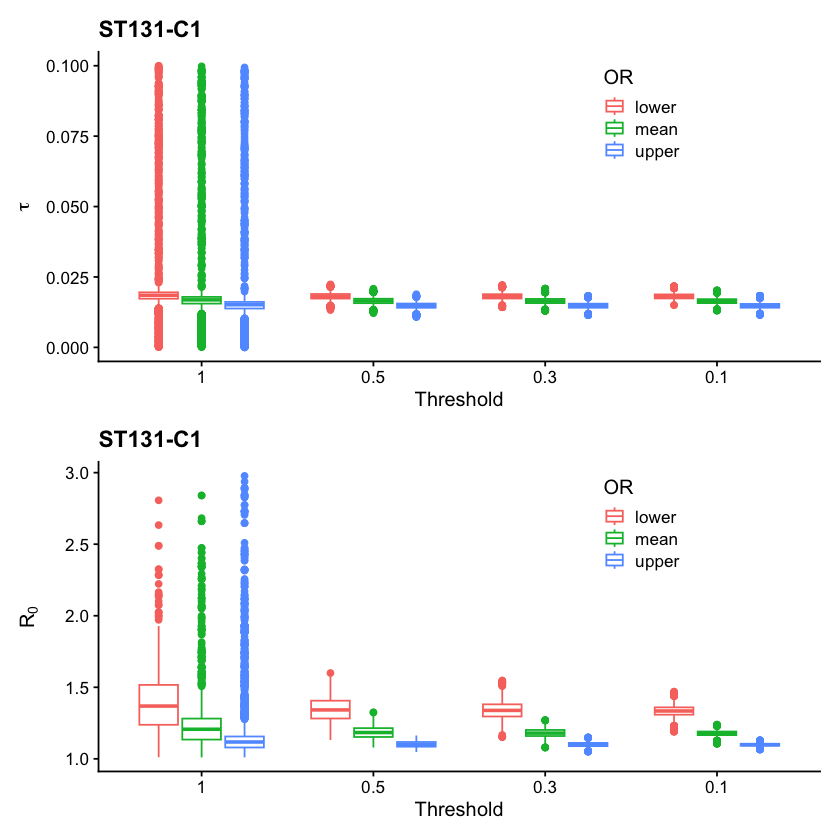

In [269]:
# Clade C1
pop_df_OR_C1 <- load_pop_data(dirs_OR_C1, clade_labels = c("lower", "mean", "upper"))

p_conv_par1 <- plot_pop_df(pop_df_OR_C1, "par1", title = "ST131-C1", legend_title = "OR")
p_conv_par2 <- plot_pop_df(pop_df_OR_C1, "par2", title = "ST131-C1", legend_title = "OR")

p_conv_par1/p_conv_par2

ggsave(p_conv_par1/p_conv_par2, filename = paste(savedir, "sensitivity/OR_sensitivity_convergence_C1.pdf", sep = ""), width = 16, height = 10, units = "cm", dpi = dpi_value)


### Sensitivity analysis for $\Delta_t$

In [270]:
dir_Dt_0_A <- "res/elfi_res/A_results/sensitivity/clade_A_2025-06-18_10-14-21_10k_Dt_0/csvs/"
dir_Dt_05_A <- dir_A
dir_Dt_5_A <- "res/elfi_res/A_results/sensitivity/clade_A_2025-06-19_07-47-28_10k_Dt_5/csvs/"

dir_Dt_0_C2 <- "res/elfi_res/C2_results/sensitivity/clade_C2_2025-06-19_10-11-31_10k_Dt_0/csvs/"
dir_Dt_05_C2 <- dir_C2
dir_Dt_5_C2 <- "res/elfi_res/C2_results/sensitivity/clade_C2_2025-06-18_14-13-35_10k_Dt_5/csvs/"

dir_Dt_0_C1 <- "res/final_res/C1_results/sensitivity/clade_C1_2025-07-02_19-37-40_Dt_0y_10k/csvs/"
dir_Dt_05_C1 <- dir_C1
dir_Dt_5_C1 <- "res/final_res/C1_results/sensitivity/clade_C1_2025-07-02_21-52-19_Dt_5y_10k/csvs/"

dirs_Dt_A <- c(dir_Dt_0_A, dir_Dt_05_A, dir_Dt_5_A)
dirs_Dt_C2 <- c(dir_Dt_0_C2, dir_Dt_05_C2, dir_Dt_5_C2)
dirs_Dt_C1 <- c(dir_Dt_0_C1, dir_Dt_05_C1, dir_Dt_5_C1)

In [271]:

samples_Dt_A <- get_post_samples_triple(dirs_Dt_A, "Dt", c("0 years", "0.5 years", "5 years"))
samples_Dt_C2 <- get_post_samples_triple(dirs_Dt_C2, "Dt", c("0 years", "0.5 years", "5 years"))
samples_Dt_C1 <- get_post_samples_triple(dirs_Dt_C1, "Dt", c("0 years", "0.5 years", "5 years"))


In [272]:
head(samples_Dt_A)

par1       R0       Dt     
1 0.02555568 1.533252 0 years
2 0.02546578 1.523513 0 years
3 0.02658992 1.470232 0 years
4 0.02349010 1.387966 0 years
5 0.02394974 1.427064 0 years
6 0.02495995 1.428577 0 years

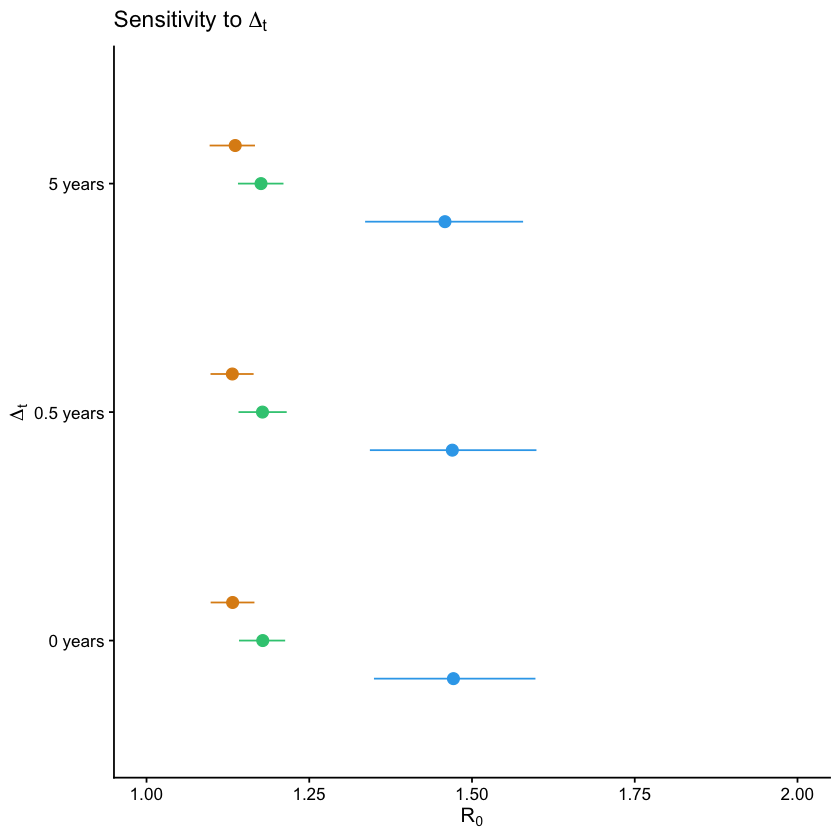

In [273]:

Dt_forest_plot_df <- get_forest_plot_df(samples_Dt_A, c("par1", "R0"), "Dt", "A")
Dt_forest_plot_df <- rbind(Dt_forest_plot_df, get_forest_plot_df(samples_Dt_C2, c("par1", "R0"), "Dt", "C2"))
Dt_forest_plot_df <- rbind(Dt_forest_plot_df, get_forest_plot_df(samples_Dt_C1, c("par1", "R0"), "Dt", "C1"))

p_Dt_R0 <- ggplot(Dt_forest_plot_df[which(Dt_forest_plot_df$variable == "R0"),], aes(x = mean, y = sens_var, color = Clade)) +
    geom_point(size = 3, position = position_dodge(width = 0.5)) +
    coord_cartesian(xlim = c(1, 2)) +
    geom_errorbarh(aes(xmin = cil95, xmax = ciu95), height = 0, position = position_dodge(width = 0.5)) +
    scale_color_manual(labels = c("A", "C1", "C2"), values = c(A_col, C1_col, C2_col)) +
    #labs(title = "Sensitivity to OR", x = expression(R[0]), y = expression(rho[c]))
    labs(title = expression(paste("Sensitivity to ",Delta[t])), x = expression(R[0]), y = expression(Delta[t])) +
    theme(legend.position = "none")
    #title = expression(paste("Sensitivity to ", rho[c])
p_Dt_R0

ggsave(p_Dt_R0, filename = paste(savedir, "sensitivity/Dt_sensitivity_R0.pdf", sep = ""), width = 8, height = 8, units = "cm", dpi = dpi_value)


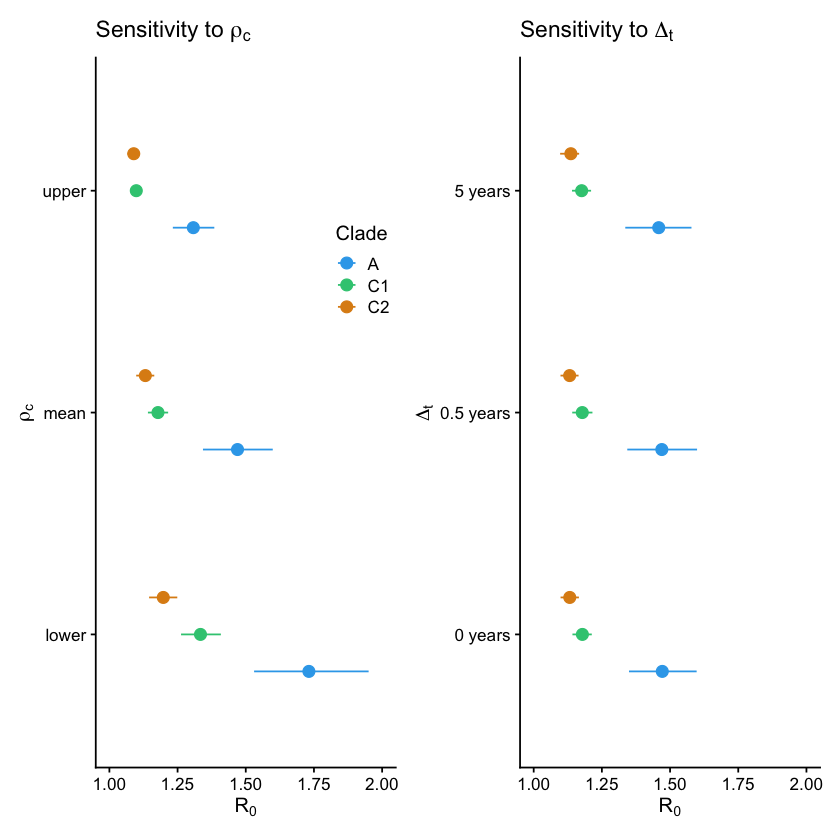

In [274]:
p_OR_R0 + p_Dt_R0
ggsave(p_OR_R0 + p_Dt_R0, filename = paste(savedir, "sensitivity/sensitivity_R0_Dt.pdf", sep = ""), width = 10, height = 5, dpi = dpi_value)


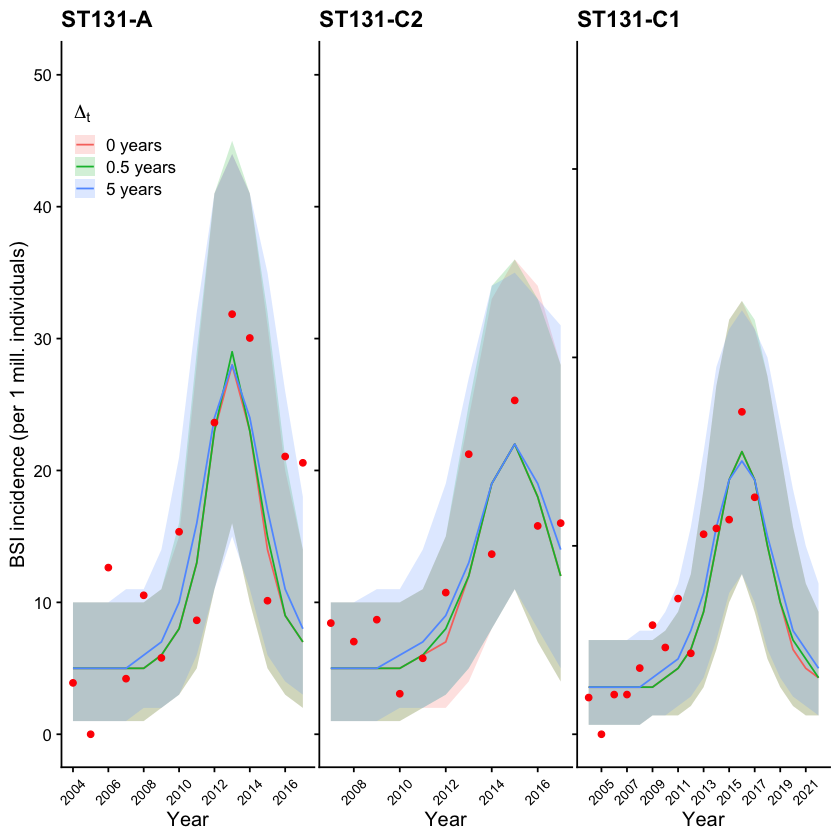

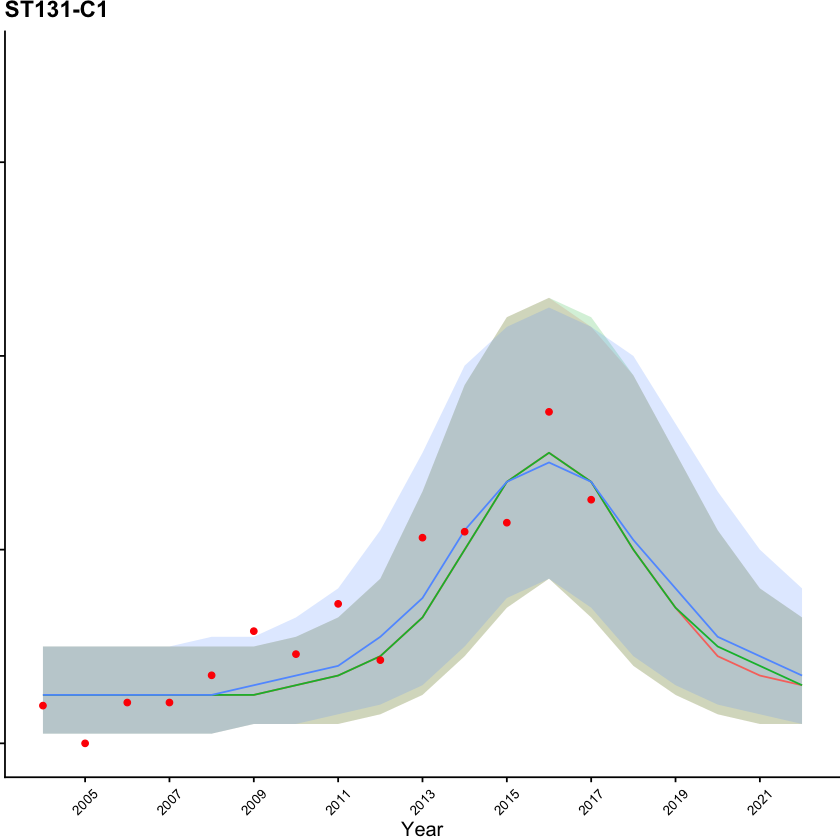

In [275]:
# Fit to data

df_Dt_fit_A <- combine_triple_fit(c(dir_Dt_0_A, dir_Dt_05_A, dir_Dt_5_A), "A",
                                  var = "Dt", var_categories = c("0 years", "0.5 years", "5 years"))
df_Dt_fit_C2 <- combine_triple_fit(c(dir_Dt_0_C2, dir_Dt_05_C2, dir_Dt_5_C2), "C2",
                                   var = "Dt", var_categories = c("0 years", "0.5 years", "5 years"),
                                   years = 2007:2017)
df_Dt_fit_C1 <- combine_triple_fit(c(dir_Dt_0_C1, dir_Dt_05_C1, dir_Dt_5_C1), "C1",
                                  var = "Dt", var_categories = c("0 years", "0.5 years", "5 years"),
                                  years = 2004:2022)

df_Dt_fit <- rbind(df_Dt_fit_A, df_Dt_fit_C2, df_Dt_fit_C1)

p_fit_Dt_A <- plot_fit(df_Dt_fit, "A", 50, var = "Dt") + labs(color = expression(Delta[t]), fill = expression(Delta[t]))
p_fit_Dt_C2 <- plot_fit(df_Dt_fit, "C2", 50, var = "Dt") + theme(legend.position = "none",
                                                              axis.title.y = element_blank(),
                                                              axis.text.y = element_blank())
p_fit_Dt_C1 <- plot_fit(df_Dt_fit, "C1", 70, var = "Dt") + theme(legend.position = "none",
                                                              axis.title.y = element_blank(),
                                                              axis.text.y = element_blank())


p_fit_Dt_A + p_fit_Dt_C2 + p_fit_Dt_C1

p_fit_Dt_C1

ggsave(p_fit_Dt_A + p_fit_Dt_C2 + p_fit_Dt_C1, filename = paste(savedir, "sensitivity/Dt_sensitivity_fit.pdf", sep = ""), width = 16, height = 8, units = "cm", dpi = dpi_value)


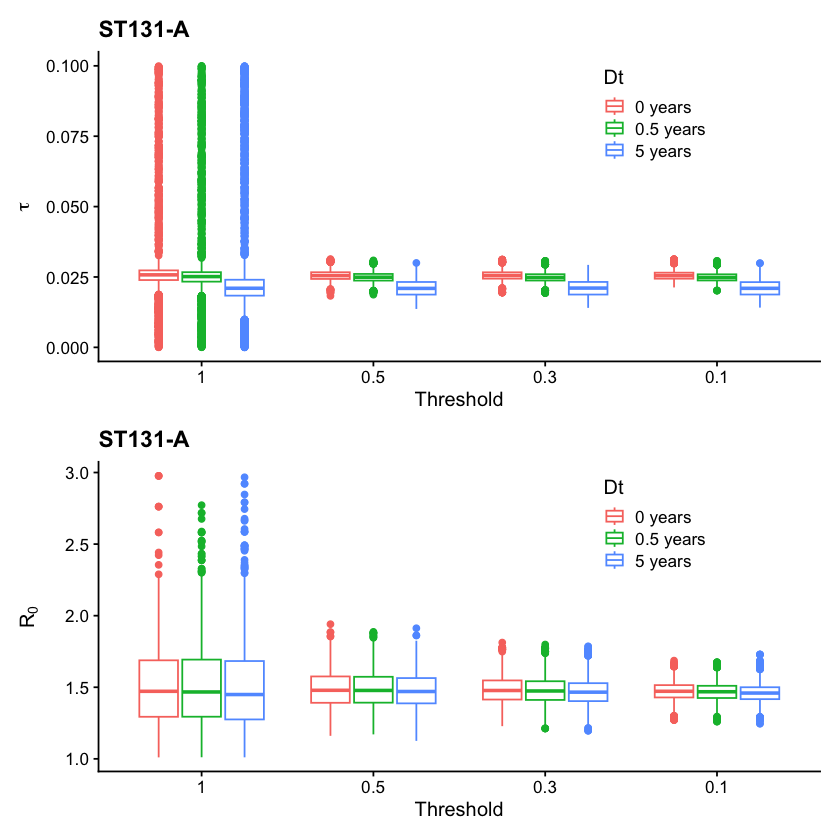

In [276]:
# Convergence for Dt

# Clade A
pop_df_Dt_A <- load_pop_data(dirs_Dt_A, clade_labels = c("0 years", "0.5 years", "5 years"))

p_conv_par1_A <- plot_pop_df(pop_df_Dt_A, "par1", title = "ST131-A", legend_title = "Dt")
p_conv_par2_A <- plot_pop_df(pop_df_Dt_A, "par2", title = "ST131-A", legend_title = "Dt")

p_conv_par1_A/p_conv_par2_A

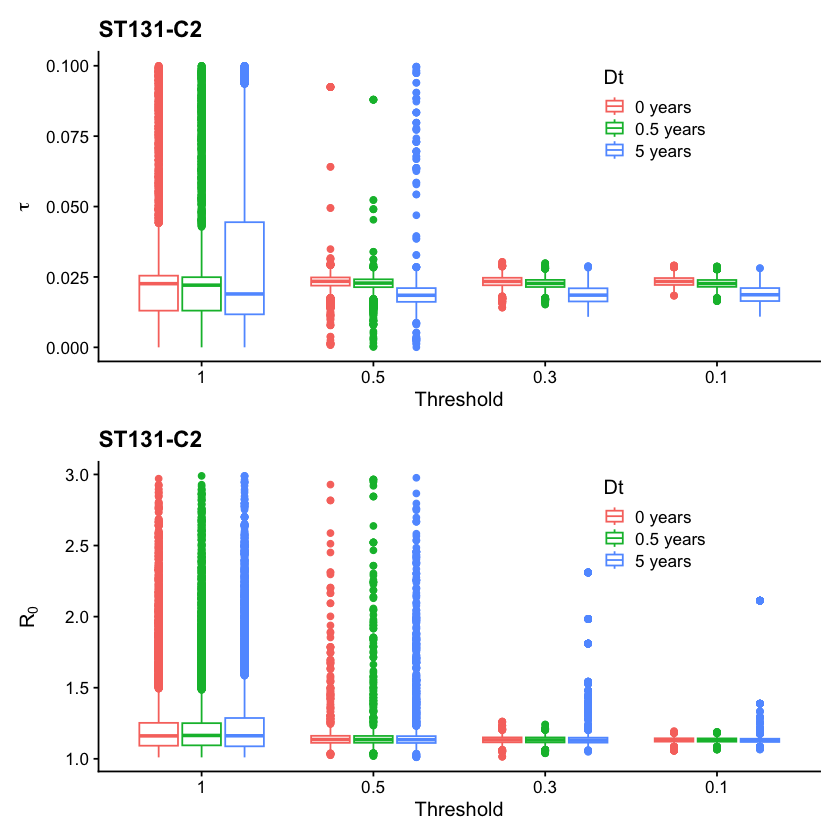

In [277]:
# Clade C2
pop_df_Dt_C2 <- load_pop_data(dirs_Dt_C2, clade_labels = c("0 years", "0.5 years", "5 years"))

p_conv_par1_C2 <- plot_pop_df(pop_df_Dt_C2, "par1", title = "ST131-C2", legend_title = "Dt")
p_conv_par2_C2 <- plot_pop_df(pop_df_Dt_C2, "par2", title = "ST131-C2", legend_title = "Dt")

p_conv_par1_C2/p_conv_par2_C2

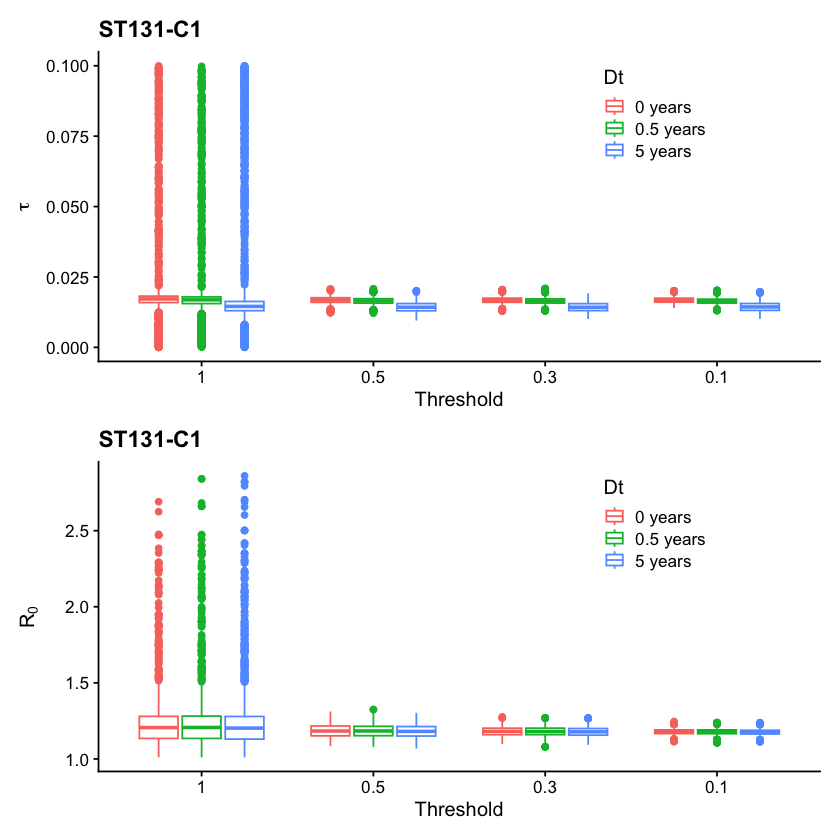

In [278]:
# Clade C1
pop_df_Dt_C1 <- load_pop_data(dirs_Dt_C1, clade_labels = c("0 years", "0.5 years", "5 years"))

p_conv_par1_C1 <- plot_pop_df(pop_df_Dt_C1, "par1", title = "ST131-C1", legend_title = "Dt")
p_conv_par2_C1 <- plot_pop_df(pop_df_Dt_C1, "par2", title = "ST131-C1", legend_title = "Dt")

p_conv_par1_C1/p_conv_par2_C1

# Model comparison: SIS

In [344]:
#dir_A_SIS <- "res/elfi_res/A_results/SIS/clade_A_2025-05-08_09-14-08/csvs/"
#dir_C2_SIS <- "res/elfi_res/C2_results/SIS/clade_C2_2025-05-08_10-45-53/csvs/"
#dir_C1_SIS <- "res/elfi_res/C1_results/SIS/clade_C1_2025-06-09_15-49-33/csvs/"

# SIS model
dir_A_SIS <- "res/final_res/A_results/model_comparison/SIS/csvs/"
dir_C2_SIS <- "res/final_res/C2_results/model_comparison/SIS/csvs/"#"res/locally_optimal_ABCSMC/result_C2_SIS/csvs/"
dir_C1_SIS <- "res/final_res/C1_results/SIS/clade_C1_2025-07-02_19-22-52/csvs/" # TODO: update

pred_A_SIS <- read.csv(paste(dir_A_SIS, "BSI_yearly_node.csv", sep = ""))
pred_C2_SIS <- read.csv(paste(dir_C2_SIS, "BSI_yearly_node.csv", sep = ""))
pred_C1_SIS <- read.csv(paste(dir_C1_SIS, "BSI_yearly_node.csv", sep = ""))

df_fit_A_SIS <- get_cis(pred_A_SIS, obs_data$Year, a = 0.95)
df_fit_C2_SIS <- get_cis(pred_C2_SIS, 2004:2017, a = 0.95) # NOTE: 2007:2017
df_fit_C1_SIS <- get_cis(pred_C1_SIS, 2004:2022, a = 0.95)

In [345]:
add_obs_data <- function(df_fit, clade){
    
    df_fit$Data <- rep("Estimated", dim(df_fit)[1])
    df_fit$clade <- rep(clade, dim(df_fit)[1])

    # add in observed data
    if (clade %in% c("C2")){
        df_obs <- mutate_obs_data(obs_data, clade) #[4:14,]
    }else{
        df_obs <- mutate_obs_data(obs_data, clade)
    }
    #df_obs[,var] <- rep(NA, dim(df_obs)[1])
    df_fit <- df_fit[,c("med", "Year", "clade", "cil", "ciu",
                        "cil50", "ciu50", "cil100", "ciu100", "Data")]
    df_fit <- rbind(df_fit, df_obs)
    
    return(df_fit)

    
}

In [346]:
df_fit_A_SIS <- add_obs_data(df_fit_A_SIS, "A")
dim(df_fit_A_SIS)
df_fit_C2_SIS <- add_obs_data(df_fit_C2_SIS, "C2")
dim(df_fit_C2_SIS)
df_fit_C1_SIS <- add_obs_data(df_fit_C1_SIS, "C1")
dim(df_fit_C1_SIS)

df_fit_SIS <- rbind(df_fit_A_SIS, df_fit_C2_SIS, df_fit_C1_SIS)


[1] 28 10

[1] 28 10

[1] 33 10

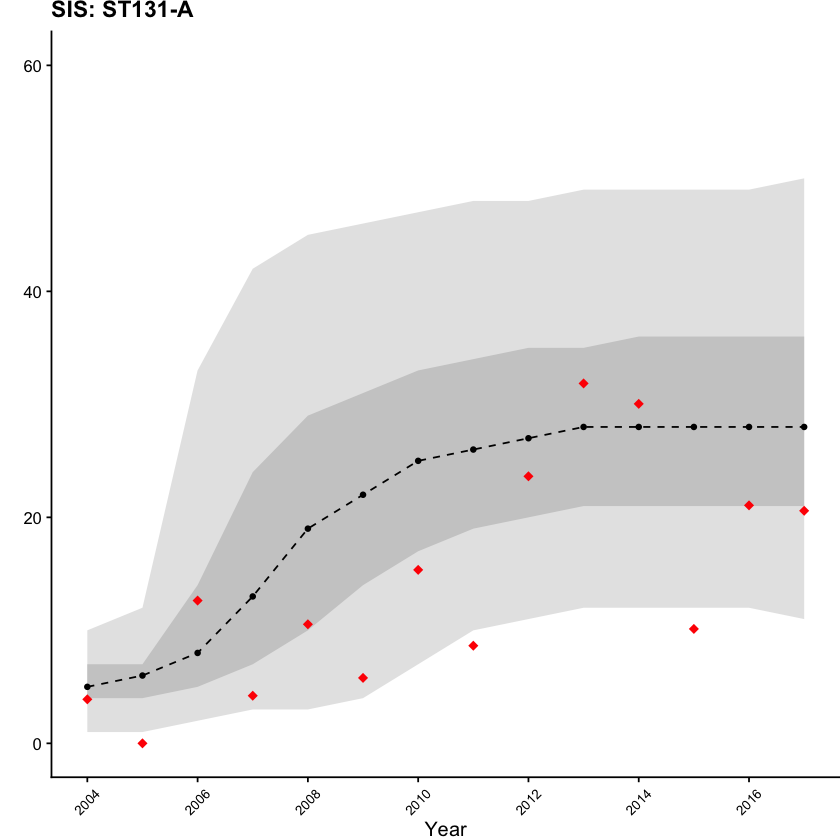

In [354]:
p_fit_SIS_A <- ggplot(df_fit_SIS[which(df_fit_SIS$clade == "A"),], aes(x = Year, y = med)) +
    geom_ribbon(aes(ymin = cil, ymax = ciu, fill = "grey90"), na.rm = TRUE) + 
    geom_ribbon(aes(ymin = cil50, ymax = ciu50, fill = "grey80"), na.rm = TRUE) +
    #geom_ribbon(aes(ymin = cil100, ymax = ciu100), na.rm = TRUE, color = "gray70", fill = NA, lty = "dashed") +
    geom_point(aes(y = med, color = Data, shape = Data, size = Data)) +
    geom_line(data = df_fit_SIS[which(df_fit_SIS$clade == "A" & df_fit_SIS$Data == "Estimated"),], aes(y = med), linetype = "dashed") +
    scale_fill_identity(name = NULL, guide = 'legend',labels = c('50% CIs', "95% CIs")) +
    scale_color_manual(values = c("black", "red")) +
    scale_shape_manual(values = c(16, 18)) +
    labs(y = "", title = "SIS: ST131-A") +
    scale_size_manual(values = c(1.5, 2.5)) +
    scale_x_continuous("Year", breaks = seq(2004, 2017, 2)) +
    coord_cartesian(ylim = c(0, ylim_max)) +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.5, size = 8),
          axis.text.y = element_text(size = 10),
          legend.position = "none",
          plot.margin = unit(c(0, 0, 0, 0), "cm"), legend.spacing.y = unit(0, "pt"), legend.margin = margin(0, 0, 0, 0))

p_fit_SIS_A

In [355]:
unique(df_fit_SIS[which(df_fit_SIS$clade == "C2"),"Data"])

[1] "Estimated" "Observed"

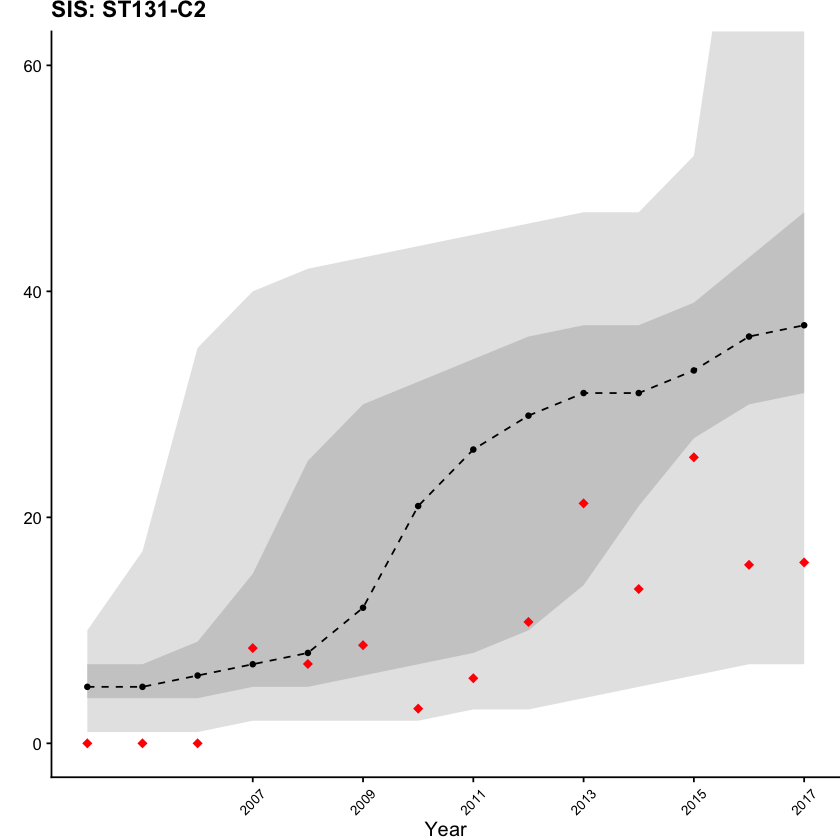

In [356]:
p_fit_SIS_C2 <- ggplot(df_fit_SIS[which(df_fit_SIS$clade == "C2"),], aes(x = Year, y = med)) +
    geom_ribbon(aes(ymin = cil, ymax = ciu, fill = "grey90"), na.rm = TRUE) + 
    geom_ribbon(aes(ymin = cil50, ymax = ciu50, fill = "grey80"), na.rm = TRUE) +
    #geom_ribbon(aes(ymin = cil100, ymax = ciu100), na.rm = TRUE, color = "gray70", fill = NA, lty = "dashed") +
    geom_point(aes(y = med, color = Data, shape = Data, size = Data)) +
    geom_line(data = df_fit_SIS[which(df_fit_SIS$clade == "C2" & df_fit_SIS$Data == "Estimated"),], aes(y = med), linetype = "dashed") +
    scale_fill_identity(name = NULL, guide = 'legend',labels = c('50% CIs', "95% CIs")) +
    scale_color_manual(values = c("black", "red")) +
    scale_shape_manual(values = c(16, 18)) +
    labs(y = "", title = "SIS: ST131-C2") +
    scale_size_manual(values = c(1.5, 2.5)) +
    scale_x_continuous("Year", breaks = seq(2007, 2017, 2)) +
    coord_cartesian(ylim = c(0, ylim_max)) +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.5, size = 8),
          axis.text.y = element_text(size = 10),
          legend.position = "none",
          plot.margin = unit(c(0, 0, 0, 0), "cm"), legend.spacing.y = unit(0, "pt"), legend.margin = margin(0, 0, 0, 0))

p_fit_SIS_C2

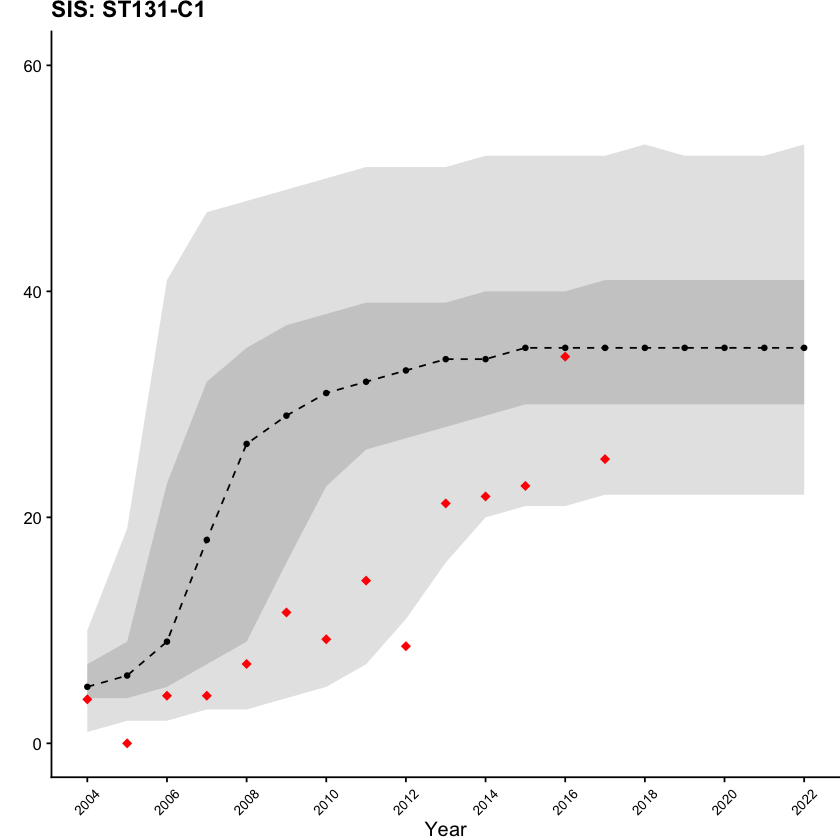

In [357]:
p_fit_SIS_C1 <- ggplot(df_fit_SIS[which(df_fit_SIS$clade == "C1"),], aes(x = Year, y = med)) +
    geom_ribbon(aes(ymin = cil, ymax = ciu, fill = "grey90"), na.rm = TRUE) + 
    geom_ribbon(aes(ymin = cil50, ymax = ciu50, fill = "grey80"), na.rm = TRUE) +
    #geom_ribbon(aes(ymin = cil100, ymax = ciu100), na.rm = TRUE, color = "gray70", fill = NA, lty = "dashed") +
    geom_point(aes(y = med, color = Data, shape = Data, size = Data)) +
    geom_line(data = df_fit_SIS[which(df_fit_SIS$clade == "C1" & df_fit_SIS$Data == "Estimated"),], aes(y = med), linetype = "dashed") +
    scale_fill_identity(name = NULL, guide = 'legend',labels = c('50% CIs', "95% CIs")) +
    scale_color_manual(values = c("black", "red")) +
    scale_shape_manual(values = c(16, 18)) +
    labs(y = "", title = "SIS: ST131-C1") +
    scale_size_manual(values = c(1.5, 2.5)) +
    scale_x_continuous("Year", breaks = seq(2004, 2022, 2)) +
    coord_cartesian(ylim = c(0, ylim_max)) +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.5, size = 8),
          axis.text.y = element_text(size = 10),
          legend.position = "none",
          plot.margin = unit(c(0, 0, 0, 0), "cm"), legend.spacing.y = unit(0, "pt"), legend.margin = margin(0, 0, 0, 0))

p_fit_SIS_C1

In [358]:
ggsave(p_fit_SIS_A + p_fit_SIS_C2 + p_fit_SIS_C1, filename = paste(savedir, "SIS_fit.pdf", sep = ""), width = 16, height = 10, units = "cm", dpi = dpi_value)


## Duration of colonization

A histogram of the duration of colonization, calculated as:

$$\frac{1}{\tau/(R_0 - 1)}$$

In [300]:
post_df <- rbind(posterior_samples_A, posterior_samples_C1, posterior_samples_C2)
post_df$clade <- c(rep("A", dim(posterior_samples_A)[1]),
                   rep("C1", dim(posterior_samples_C1)[1]),
                   rep("C2", dim(posterior_samples_C2)[1]))
col_duration <- c()

for(clade in unique(post_df$clade)){
    print(clade)
    col_dur <- 1/(post_df[which(post_df$clade == clade),"par1"]/(post_df[which(post_df$clade == clade),"par2"] - 1))
    col_duration <- c(col_duration, col_dur)
}

post_df$col_duration <- col_duration


[1] "A"
[1] "C1"
[1] "C2"


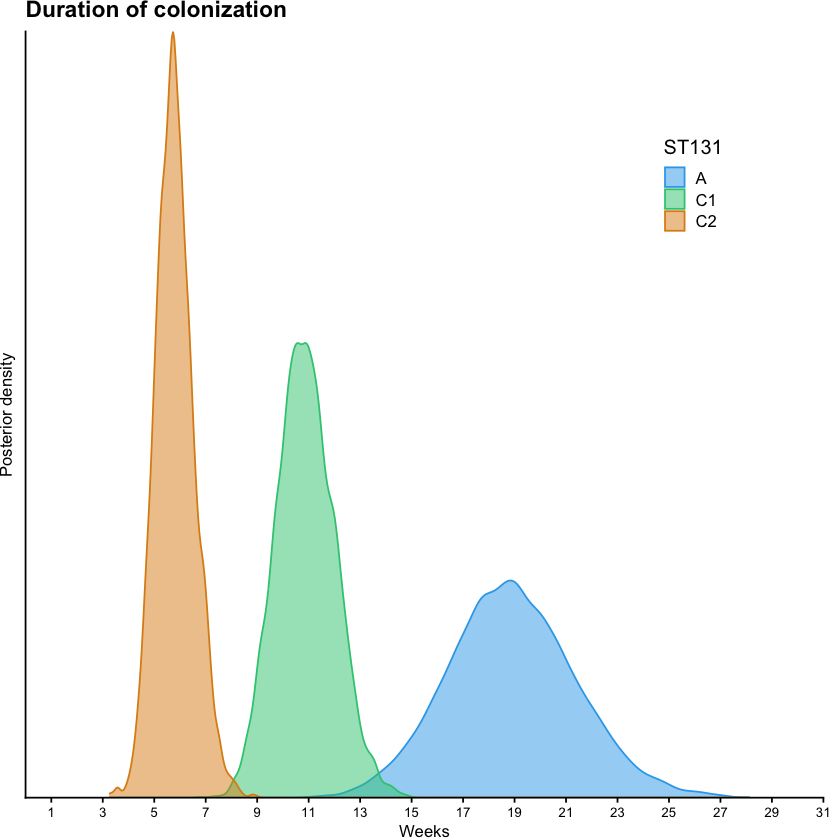

In [301]:
p_col_duration <- ggplot(post_df, aes(fill = clade, x = col_duration)) + 
    labs(title = "Duration of colonization", x = "Weeks", y = "Posterior density") +
    coord_cartesian(xlim = c(0, 31), expand = FALSE) +
    geom_density(aes(color = clade), alpha = 0.5) +
    scale_x_continuous(breaks = seq(1, 131, 2)) +
    scale_color_manual(name = "ST131", values = c(A_col, C1_col, C2_col), labels = c("A", "C1", "C2")) +
    scale_fill_manual(name = "ST131", values = c(A_col, C1_col, C2_col), labels = c("A", "C1", "C2")) +
    #scale_linetype_manual(name = "Estimate", values = c("dashed", "solid"), labels = c("Median", "Mean")) +
    theme(legend.position = c(0.8, 0.8), axis.ticks.y=element_blank(),plot.margin = margin(0, 10, 0, 0),
          axis.text.x = element_text(size = ax_ticks_fs), # , angle = 45 
          axis.text.y = element_blank(),
          axis.title.x = element_text(size = ax_title_fs),
          axis.title.y = element_text(size = ax_title_fs),
          legend.text = element_text(size = legend_fs))

p_col_duration

In [302]:
ggsave(p_col_duration, filename = paste(savedir, "colonization_duration.pdf", sep = ""), width = fw, height = fh, dpi = dpi_value)


### Acceptance rate & threshold

In [359]:
get_ar_eps_df <- function(clade, acceptance_rate_SIR, acceptance_rate_SIS, eps_SIR, eps_SIS){
    
    df_ar_eps<- data.frame("acceptance_rate" = c(acceptance_rate_SIR, acceptance_rate_SIS),
                         "threshold" = c(eps_SIR, eps_SIS),
                         "population" = c(1,2,3,4, 1, 2, 3, 4),
                          "clade" = c(rep(clade, 8)),
                          "model" = c(rep("SIR", 4), rep("SIS", 4)))

    return(df_ar_eps)
    
}

df_ar_eps_A <- get_ar_eps_df("A",c(0.12364913, 0.13598597, 0.04143824, 0.12039055),
                          c(0.16427375, 0.09605318, 0.04444583, 0.02816846),
                          c(2.0, 1.5, 1.0, 0.5),
                          c(2.0, 1.5, 1.0, 0.5))

df_ar_eps_C2 <- get_ar_eps_df("C2", c(0.09487396, 0.10025465, 0.0218488, 0.03025298),
                              c(0.06104558884575001, 0.05057734033998088, 0.008008226049798353, 0.00013382919906610238),
                              c(2.0, 1.5, 1.0, 0.5),
                              c(2.0, 1.5, 1.0, 0.5))

df_ar_eps_C1 <- get_ar_eps_df("C1", c(0.04975124378109453, 0.03496503496503497, 0.008598452278589854, 0.007132667617689016),
                              c(0.035842293906810034, 0.01366120218579235, 0.001783166904422254, 0.000728013977868375),
                              c(2.0, 1.5, 1.0, 0.5),
                              c(2.0, 1.5, 1.0, 0.5))
#0.04975124378109453, 0.03496503496503497, 0.008598452278589854, 0.007132667617689016 
# SIR, locally optimal ABC-SMC: c(0.11096069772086727, 0.17570678052466043, 0.020232348287736363, 0.02844553675305576)
# SIS, locally optimal ABC-SMC: c(0.1269970282695385, 0.128582633629502, 0.009409338203606787, 0.0016150262038001567)
df_ar_eps <- rbind(df_ar_eps_A, df_ar_eps_C2, df_ar_eps_C1)
                          

In [360]:
df_ar_eps

acceptance_rate threshold population clade model
1  0.1236491300    2.0       1          A     SIR  
2  0.1359859700    1.5       2          A     SIR  
3  0.0414382400    1.0       3          A     SIR  
4  0.1203905500    0.5       4          A     SIR  
5  0.1642737500    2.0       1          A     SIS  
6  0.0960531800    1.5       2          A     SIS  
7  0.0444458300    1.0       3          A     SIS  
8  0.0281684600    0.5       4          A     SIS  
9  0.0948739600    2.0       1          C2    SIR  
10 0.1002546500    1.5       2          C2    SIR  
11 0.0218488000    1.0       3          C2    SIR  
12 0.0302529800    0.5       4          C2    SIR  
13 0.0610455888    2.0       1          C2    SIS  
14 0.0505773403    1.5       2          C2    SIS  
15 0.0080082260    1.0       3          C2    SIS  
16 0.0001338292    0.5       4          C2    SIS  
17 0.0497512438    2.0       1          C1    SIR  
18 0.0349650350    1.5       2          C1    SIR  
19 0.0085984523    1.0       3          C1    SIR  
20 0.0071326676    0.5       4          C1    SIR  
21 0.0358422939    2.0       1          C1    SIS  
22 0.0136612022    1.5       2          C1    SIS  
23 0.0017831669    1.0       3          C1    SIS  
24 0.0007280140    0.5       4          C1    SIS

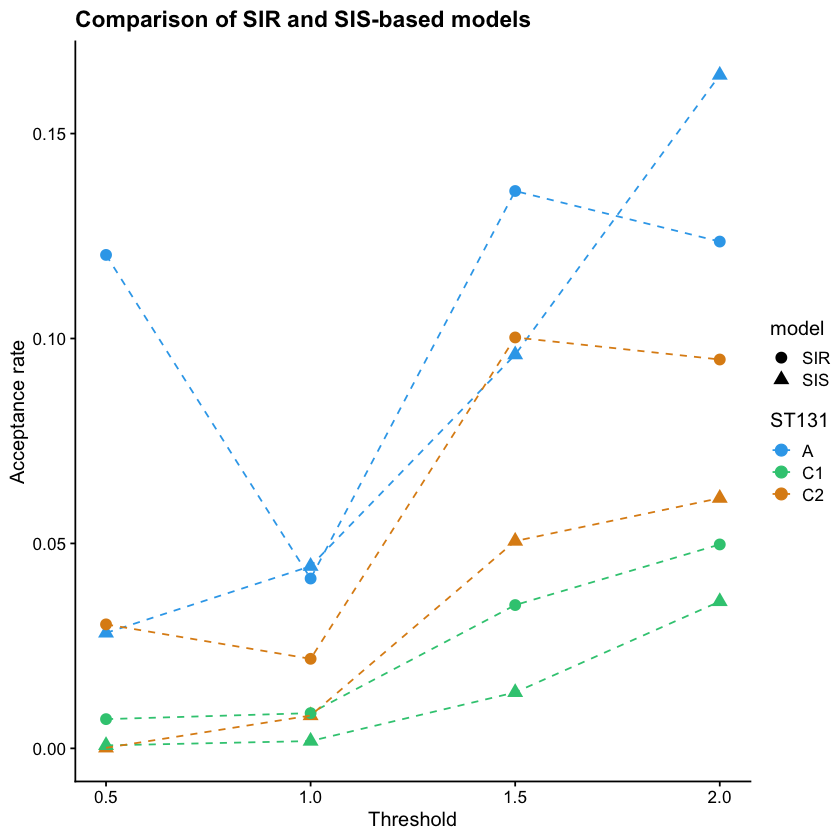

In [361]:
p_ar_eps <- ggplot(df_ar_eps, aes(x = threshold,
                                  y = acceptance_rate,
                                  color = clade,
                                  shape = model)) +
    geom_point(size = 3) +
    geom_line(lty = "dashed") +
    scale_color_manual(name = "ST131", values = c(A_col, C1_col, C2_col), labels = c("A", "C1", "C2")) +
    labs(title = "Comparison of SIR and SIS-based models", y = "Acceptance rate", x = "Threshold")

p_ar_eps

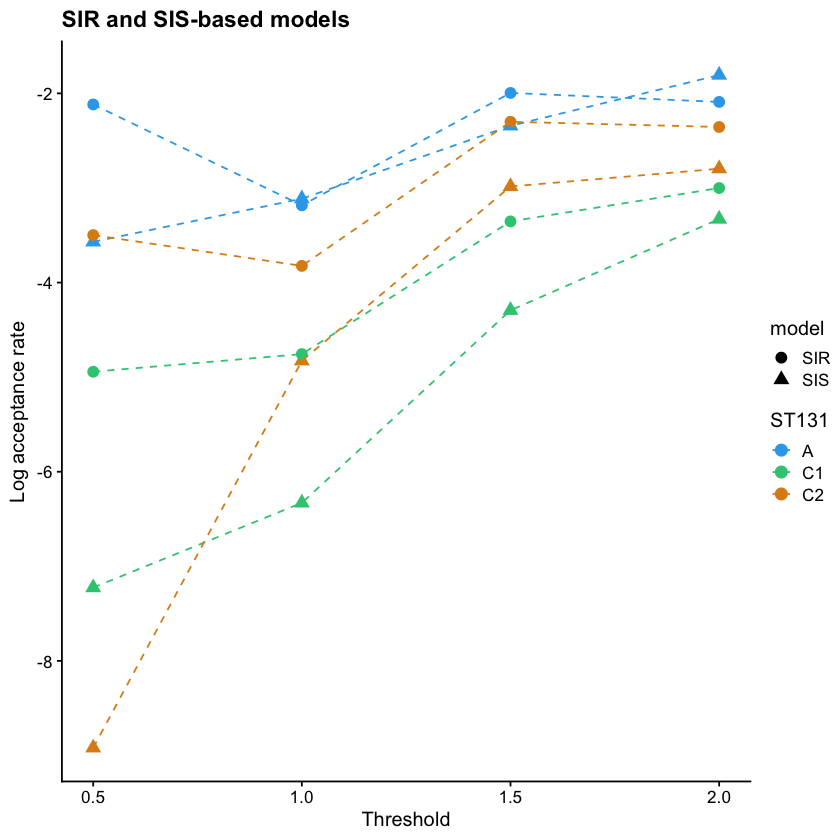

In [362]:
log_df_ar_eps <- df_ar_eps
log_df_ar_eps$acceptance_rate <- log(log_df_ar_eps$acceptance_rate)
p_ar_eps <- ggplot(log_df_ar_eps, aes(x = threshold,
                                  y = acceptance_rate,
                                  color = clade,
                                  shape = model)) +
    geom_point(size = 3) +
    geom_line(lty = "dashed") +
    scale_color_manual(name = "ST131", values = c(A_col, C1_col, C2_col), labels = c("A", "C1", "C2")) +
    labs(title = "SIR and SIS-based models", y = "Log acceptance rate", x = "Threshold")

p_ar_eps

max_fw = 21
max_fh = 21
ggsave(p_ar_eps, filename = paste(savedir, "AR_eps.pdf", sep = ""), width = max_fw, height = max_fh/2, units = "cm", dpi = dpi_value) 
